# 1. 필요 패키지 정의

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
plt.style.use("ggplot")
warnings.filterwarnings('ignore')
import os 
from google.colab import drive
drive.mount('/content/drvie')
train_data= pd.read_excel("/content/drvie/MyDrive/bigcon1.xlsx")

Drive already mounted at /content/drvie; to attempt to forcibly remount, call drive.mount("/content/drvie", force_remount=True).


# 2.Data Check

In [ ]:
train_data.shape

(42073, 10)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42073 entries, 0 to 42072
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REG_DATE       42073 non-null  datetime64[ns]
 1   P_TYPE         42073 non-null  object        
 2   CTRY_1         42073 non-null  object        
 3   CTRY_2         42073 non-null  object        
 4   P_PURPOSE      42073 non-null  object        
 5   CATEGORY_1     42073 non-null  object        
 6   CATEGORY_2     42073 non-null  object        
 7   P_NAME         42073 non-null  object        
 8   P_IMPORT_TYPE  42073 non-null  object        
 9   P_PRICE        42073 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 3.2+ MB


In [ ]:
train_data.head(5)

REG_DATE P_TYPE CTRY_1  ...     P_NAME P_IMPORT_TYPE    P_PRICE
0 2015-12-28    수산물  아르헨티나  ...  아르헨티나붉은새우            냉동   7.480000
1 2015-12-28    수산물    바레인  ...         꽃게            냉동   2.920000
2 2015-12-28    수산물    바레인  ...         꽃게         냉동,절단   3.356352
3 2015-12-28    수산물     칠레  ...         해삼         건조,자숙  18.260870
4 2015-12-28    수산물     중국  ...         서대            냉동   4.791340

[5 rows x 10 columns]

In [ ]:
train_data.tail(5)

REG_DATE P_TYPE CTRY_1  ... P_NAME P_IMPORT_TYPE    P_PRICE
42068 2019-12-30    수산물    러시아  ...     왕게             활  38.437099
42069 2019-12-30    수산물     중국  ...     낙지             활   8.282274
42070 2019-12-30    수산물    러시아  ...     대게             활  23.396192
42071 2019-12-30    수산물     중국  ...    바지락             활   0.852967
42072 2019-12-30    수산물   노르웨이  ...     연어            냉장  13.205675

[5 rows x 10 columns]

In [ ]:
train_data.describe()

P_PRICE
count  42073.000000
mean       9.545346
std       21.914624
min        0.203770
25%        2.654165
50%        5.165478
75%        9.929108
max     1522.038402

In [ ]:
objects=train_data.select_dtypes(include=['object'])
objects.columns

Index(['P_TYPE', 'CTRY_1', 'CTRY_2', 'P_PURPOSE', 'CATEGORY_1', 'CATEGORY_2',
       'P_NAME', 'P_IMPORT_TYPE'],
      dtype='object')

In [ ]:
train_data.isnull().sum()

REG_DATE         0
P_TYPE           0
CTRY_1           0
CTRY_2           0
P_PURPOSE        0
CATEGORY_1       0
CATEGORY_2       0
P_NAME           0
P_IMPORT_TYPE    0
P_PRICE          0
dtype: int64

In [ ]:
train_data[train_data['CTRY_1'] != train_data['CTRY_2'] ]

REG_DATE P_TYPE CTRY_1  ...   P_NAME P_IMPORT_TYPE    P_PRICE
17    2015-12-28    수산물    프랑스  ...  대서양참다랑어            냉장  28.868041
23    2015-12-28    수산물   대한민국  ...       미역            염장   0.913119
39    2015-12-28    수산물     대만  ...       꽁치            냉동   0.956387
40    2015-12-28    수산물     대만  ...     눈다랑어   냉동,필렛(F),횟감  12.799577
41    2015-12-28    수산물     대만  ...     눈다랑어      냉동,목살,횟감   3.628571
...          ...    ...    ...  ...      ...           ...        ...
42006 2019-12-30    수산물   에콰도르  ...       갈치            냉동   1.774222
42009 2019-12-30    수산물    러시아  ...       명태            냉동   5.051081
42030 2019-12-30    수산물    러시아  ...    각시가자미            냉동   2.263721
42040 2019-12-30    수산물    러시아  ...       명태      냉동,필렛(F)   3.226426
42059 2019-12-30    수산물     중국  ...       부세            냉동   4.218076

[4439 rows x 10 columns]

# 3.EDA

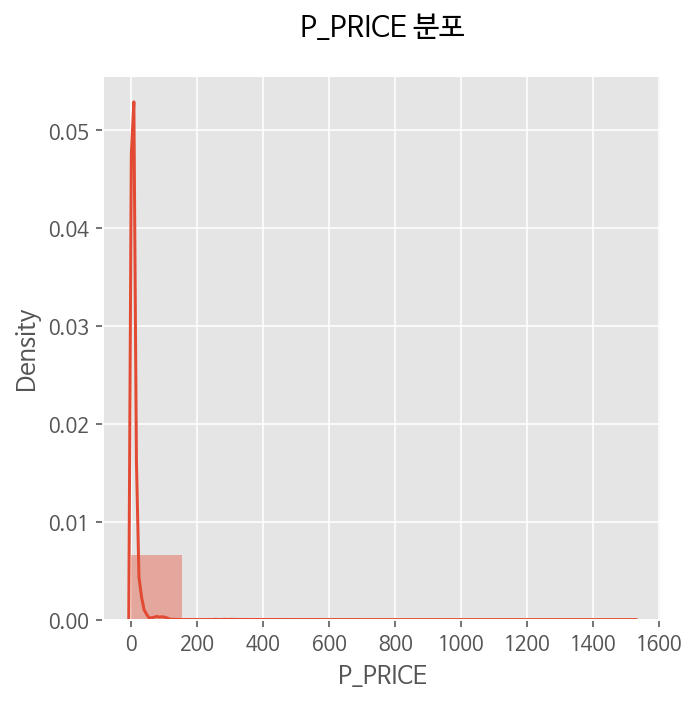

In [ ]:
plt.figure(figsize=(5,5))
plt.title("P_PRICE 분포", pad= 20)
sns.distplot(train_data['P_PRICE'],bins=10)

In [ ]:
CTRY1_MEAN = train_data.groupby('CTRY_1')['P_PRICE'].agg(**{'CTRY_1 mean price':'mean'}).reset_index()
CTRY1_MEAN=CTRY1_MEAN.sort_values(by=['CTRY_1 mean price'], axis=0,ascending=False)

In [ ]:
CATEGORY_1_MEAN=train_data.groupby('CATEGORY_1')['P_PRICE'].agg(**{'Category 1 mean price':'mean'}).reset_index()
CATEGORY_1_MEAN=CATEGORY_1_MEAN.sort_values(by=['Category 1 mean price'], axis=0,ascending=False)

In [ ]:
CATEGORY_2_MEAN=train_data.groupby('CATEGORY_2')['P_PRICE'].agg(**{'Category 2 mean price':'mean'}).reset_index()
CATEGORY_2_MEAN=CATEGORY_2_MEAN.sort_values(by=['Category 2 mean price'], axis=0,ascending=False)

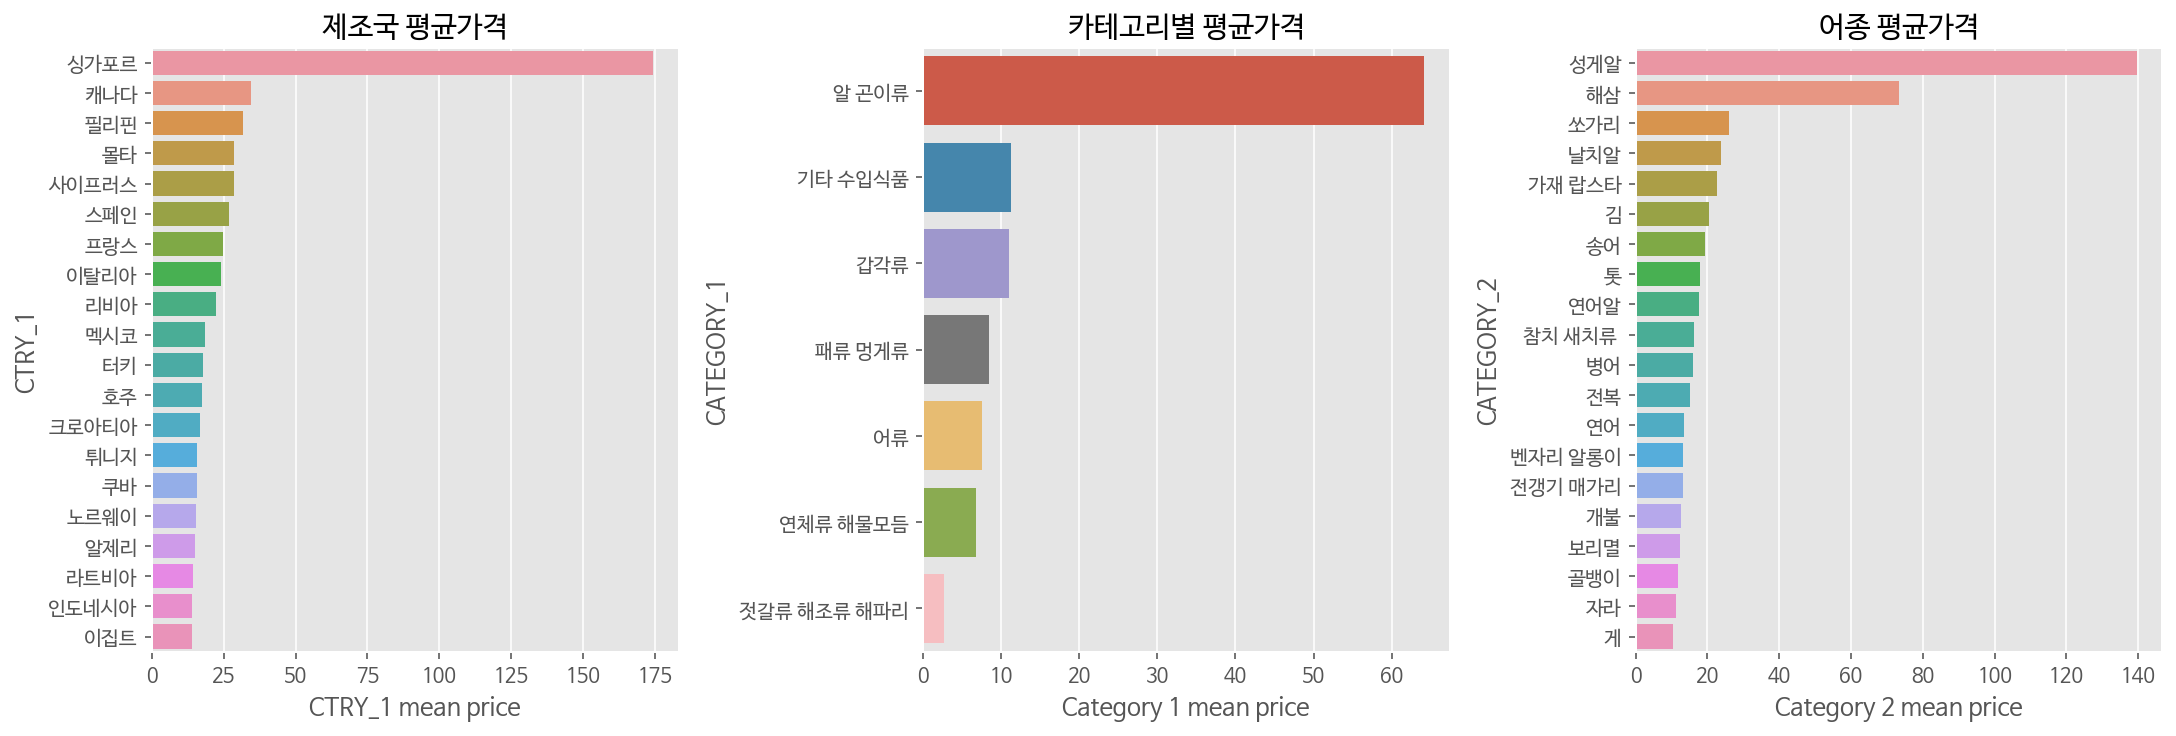

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=False,constrained_layout=True)
sns.barplot(data = CTRY1_MEAN[0:20], y='CTRY_1', x='CTRY_1 mean price',ax=axes[0])
axes[0].set_title("제조국 평균가격")
sns.barplot(data = CATEGORY_1_MEAN, y='CATEGORY_1', x='Category 1 mean price',ax=axes[1]) 
axes[1].set_title("카테고리별 평균가격")
sns.barplot(data = CATEGORY_2_MEAN[0:20], y='CATEGORY_2', x='Category 2 mean price',ax=axes[2])
axes[2].set_title("어종 평균가격")
plt.show()

In [ ]:
x=train_data.groupby('CATEGORY_1')
x.count()

REG_DATE  P_TYPE  CTRY_1  ...  P_NAME  P_IMPORT_TYPE  P_PRICE
CATEGORY_1                             ...                                
갑각류              7298    7298    7298  ...    7298           7298     7298
기타 수입식품            63      63      63  ...      63             63       63
알 곤이류            1037    1037    1037  ...    1037           1037     1037
어류              21339   21339   21339  ...   21339          21339    21339
연체류 해물모듬         6772    6772    6772  ...    6772           6772     6772
젓갈류 해조류 해파리       467     467     467  ...     467            467      467
패류 멍게류           5097    5097    5097  ...    5097           5097     5097

[7 rows x 9 columns]

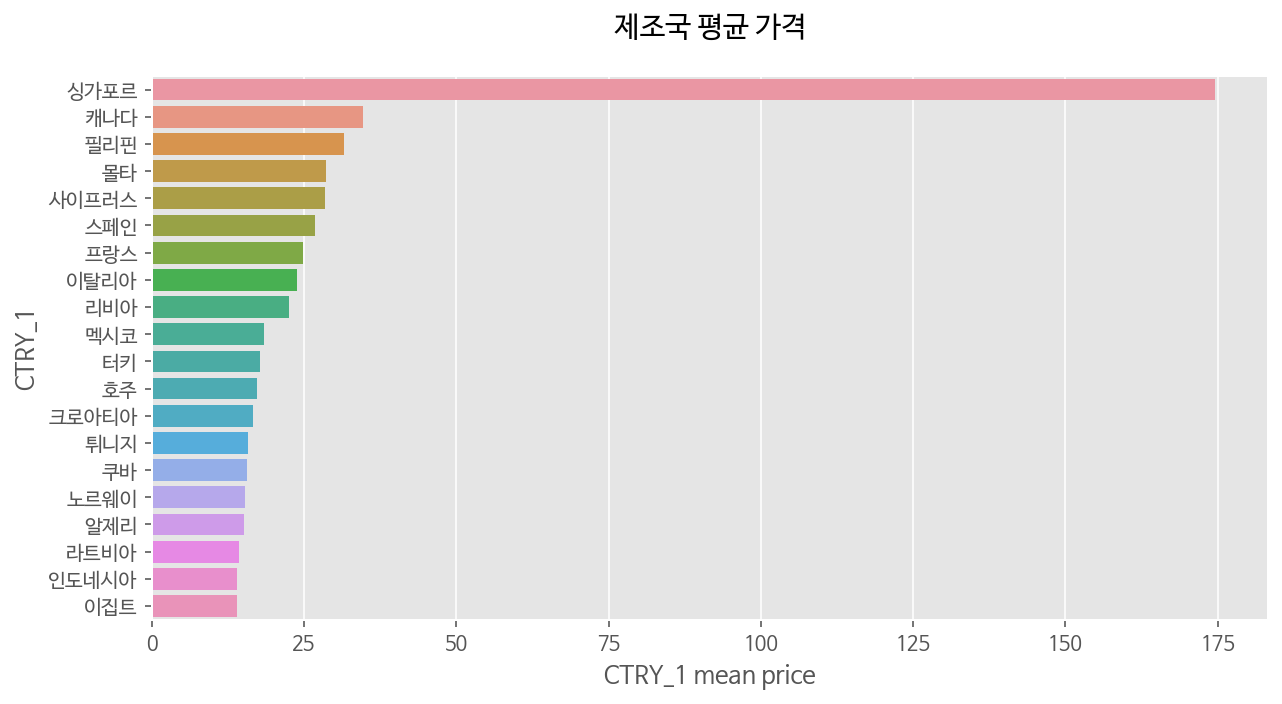

In [ ]:
#CTRY_1 확인 결과 싱가포르가 제조국 평균 가격이 극단적으로 높음을 알수있음 값 확인은 위의 Value_counts() 코드 확인
plt.figure(figsize=(10,5))
plt.title('제조국 평균 가격', pad= 20)
sns.barplot(data = CTRY1_MEAN[0:20], y='CTRY_1', x='CTRY_1 mean price') 

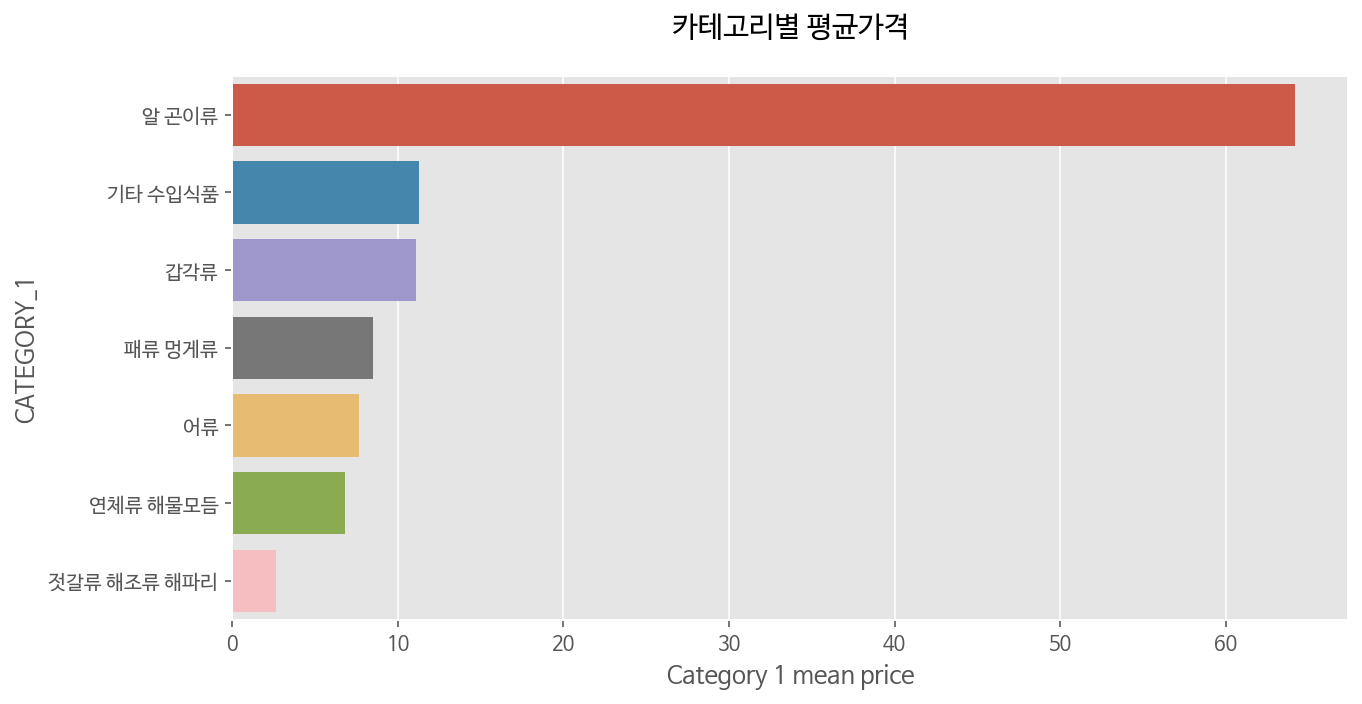

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 0)
plt.title('카테고리별 평균가격', pad= 20)
sns.barplot(data = CATEGORY_1_MEAN, y='CATEGORY_1', x='Category 1 mean price') 

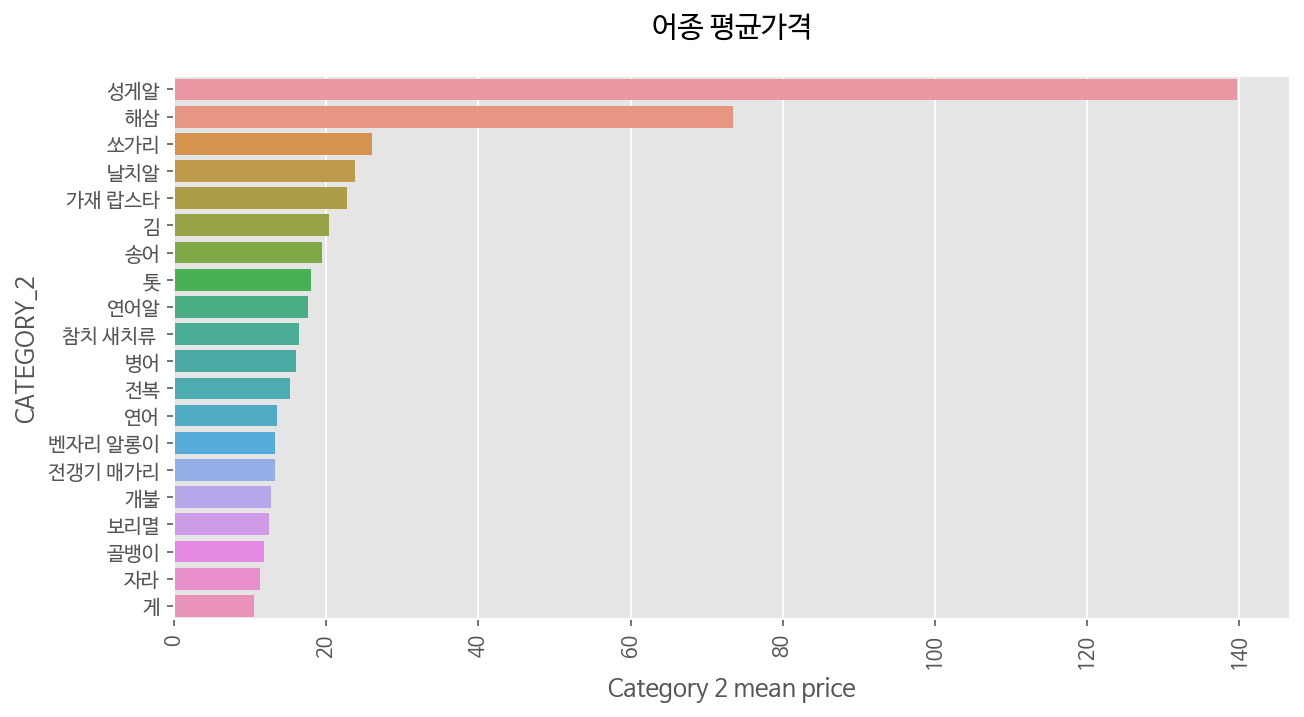

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
plt.title('어종 평균가격', pad= 20)
sns.barplot(data = CATEGORY_2_MEAN[0:20], y='CATEGORY_2', x='Category 2 mean price')

In [ ]:
range(len(objects.columns))

range(0, 8)

In [ ]:
sortvalue=train_data['CTRY_1'].value_counts()
sortvalue

중국           11029
러시아           4031
베트남           3946
일본            2855
미국            2777
             ...  
미크로네시아 연방        1
그리스              1
이란               1
팔라우              1
니카라과             1
Name: CTRY_1, Length: 87, dtype: int64

In [ ]:
sortvalue2=train_data['CTRY_2'].value_counts()
sortvalue2

중국     12008
일본      4849
베트남     4027
러시아     2924
미국      2400
       ...  
수리남        1
그리스        1
벨리즈        1
팔라우        1
쿠바         1
Name: CTRY_2, Length: 88, dtype: int64

Text(0.5, 1.0, 'P_PRICE OF REG_DATA CATEGORY_1')

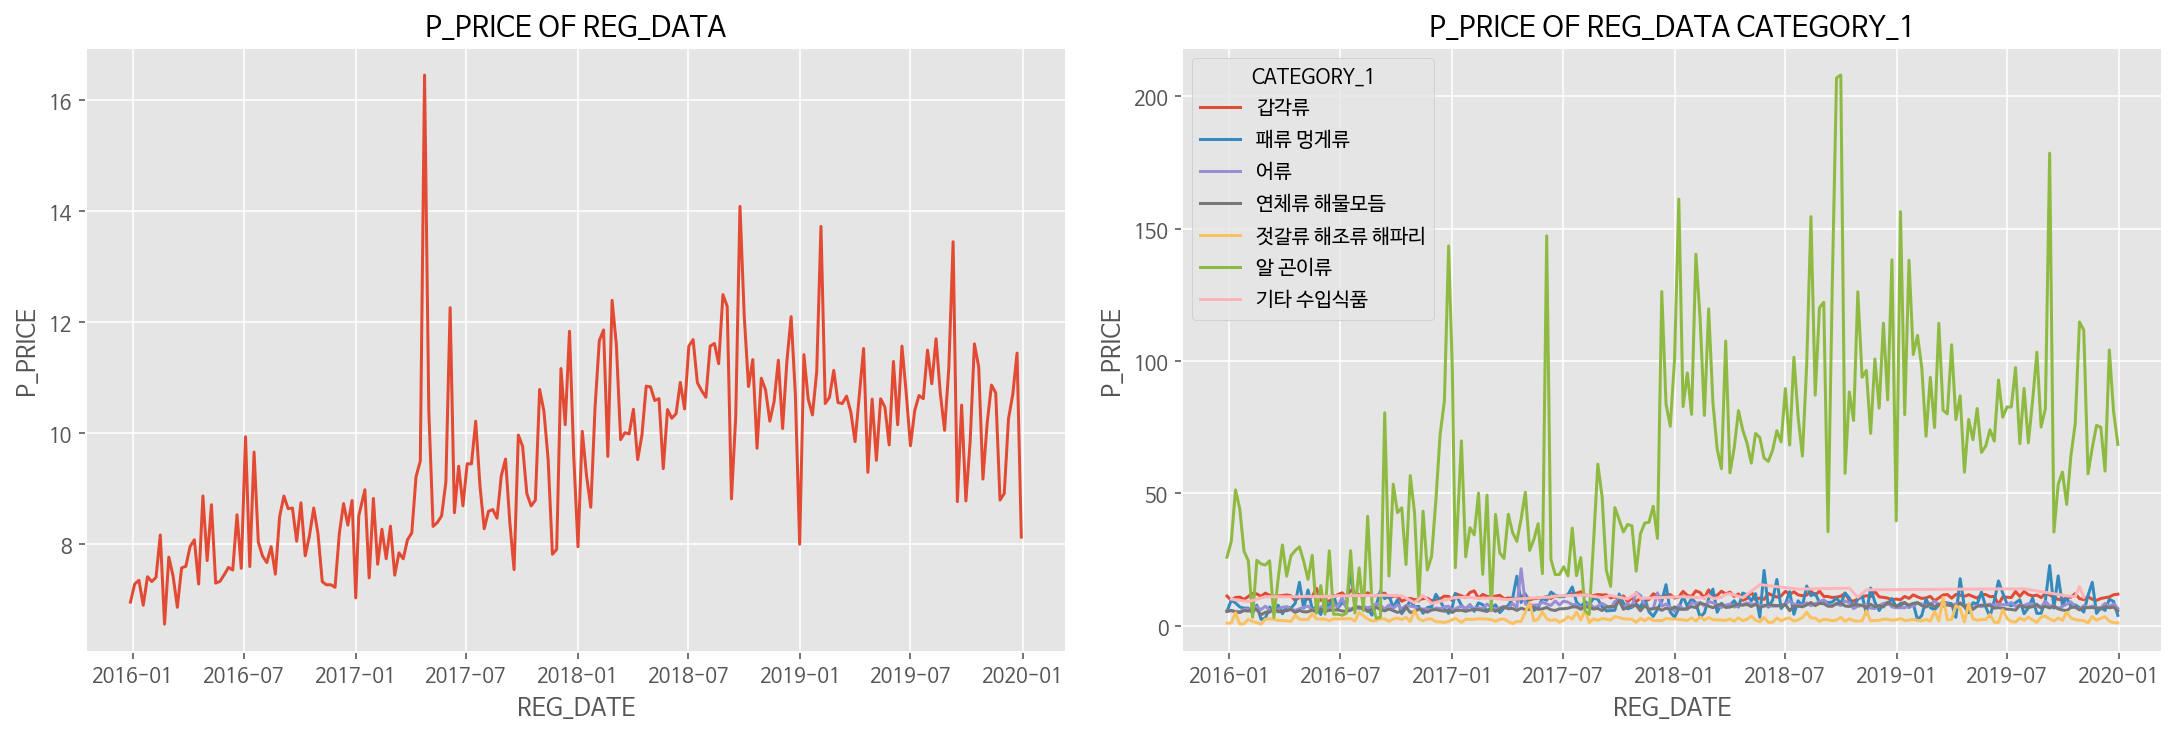

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False,constrained_layout=True)
sns.lineplot(data = train_data, x='REG_DATE', y='P_PRICE',ci=None,ax=axes[0])
axes[0].set_title("P_PRICE OF REG_DATA")
sns.lineplot(data = train_data, x='REG_DATE', y='P_PRICE',hue='CATEGORY_1',ci=None,ax=axes[1])
axes[1].set_title("P_PRICE OF REG_DATA CATEGORY_1")

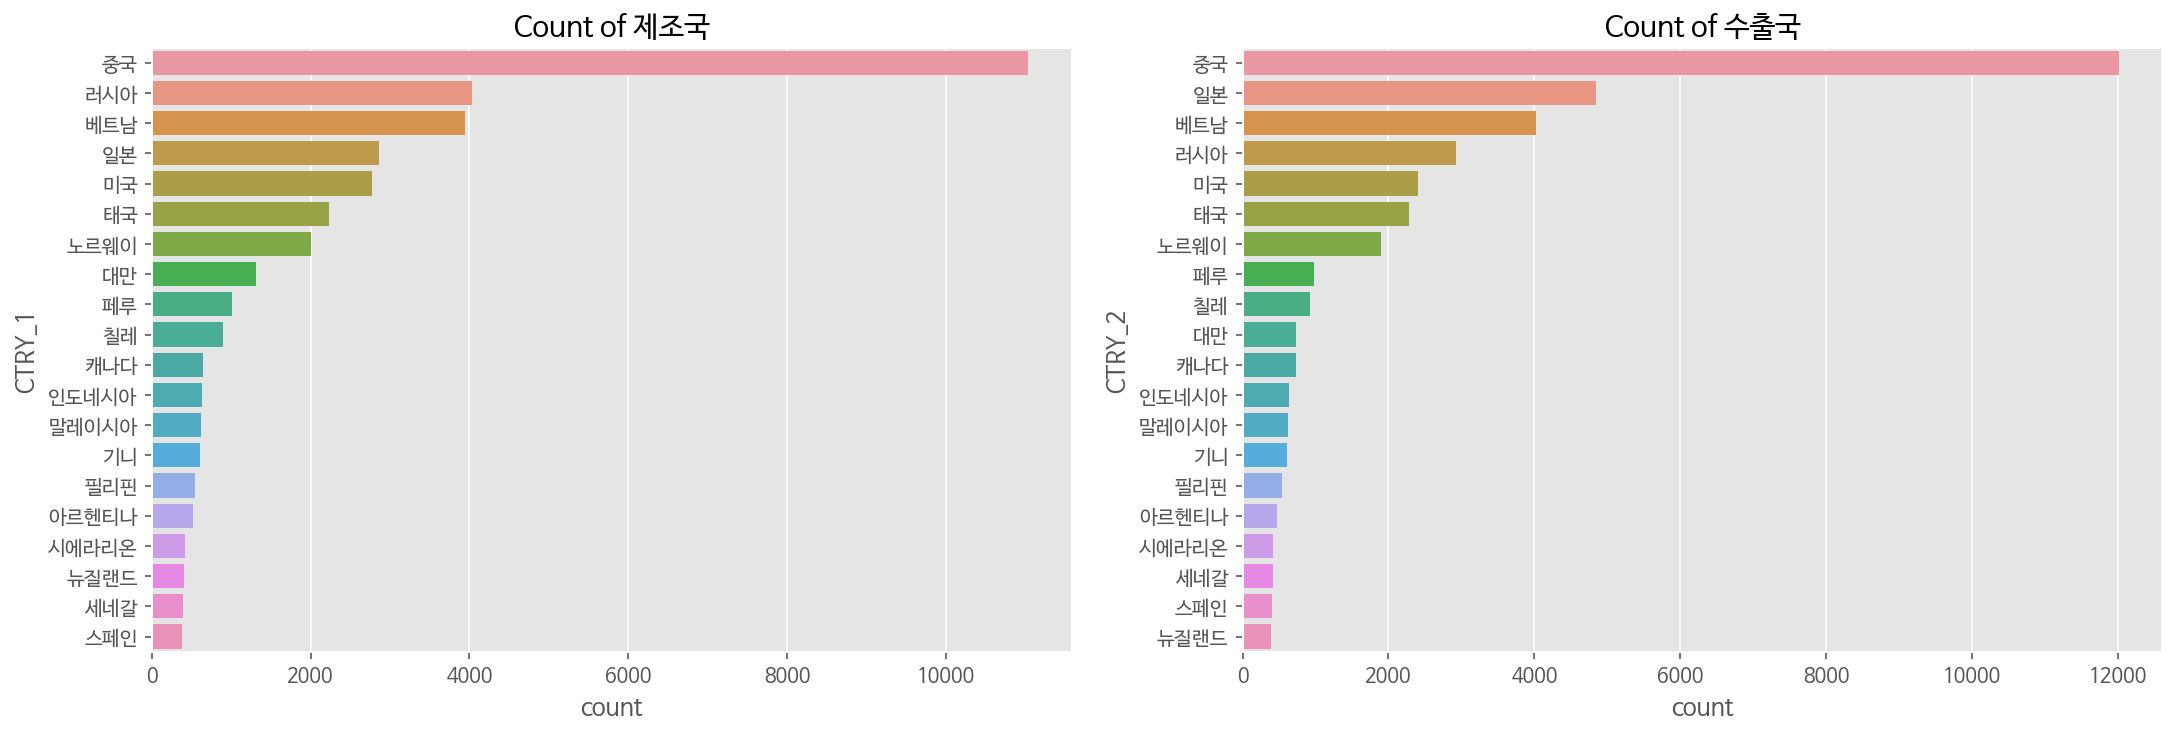

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False,constrained_layout=True)
sns.countplot(data = train_data, y='CTRY_1',order = sortvalue.index[0:20],ax=axes[0])
axes[0].set_title("Count of 제조국")
sns.countplot(data = train_data, y='CTRY_2',order = sortvalue2.index[0:20],ax=axes[1])
axes[1].set_title("Count of 수출국")
plt.show()

In [ ]:
CATEGORY_1=train_data['CATEGORY_1'].value_counts()
CATEGORY_1

어류             21339
갑각류             7298
연체류 해물모듬        6772
패류 멍게류          5097
알 곤이류           1037
젓갈류 해조류 해파리      467
기타 수입식품           63
Name: CATEGORY_1, dtype: int64

In [ ]:
labels=CATEGORY_1.keys()
labels

Index(['어류', '갑각류', '연체류 해물모듬', '패류 멍게류', '알 곤이류', '젓갈류 해조류 해파리', '기타 수입식품'], dtype='object')

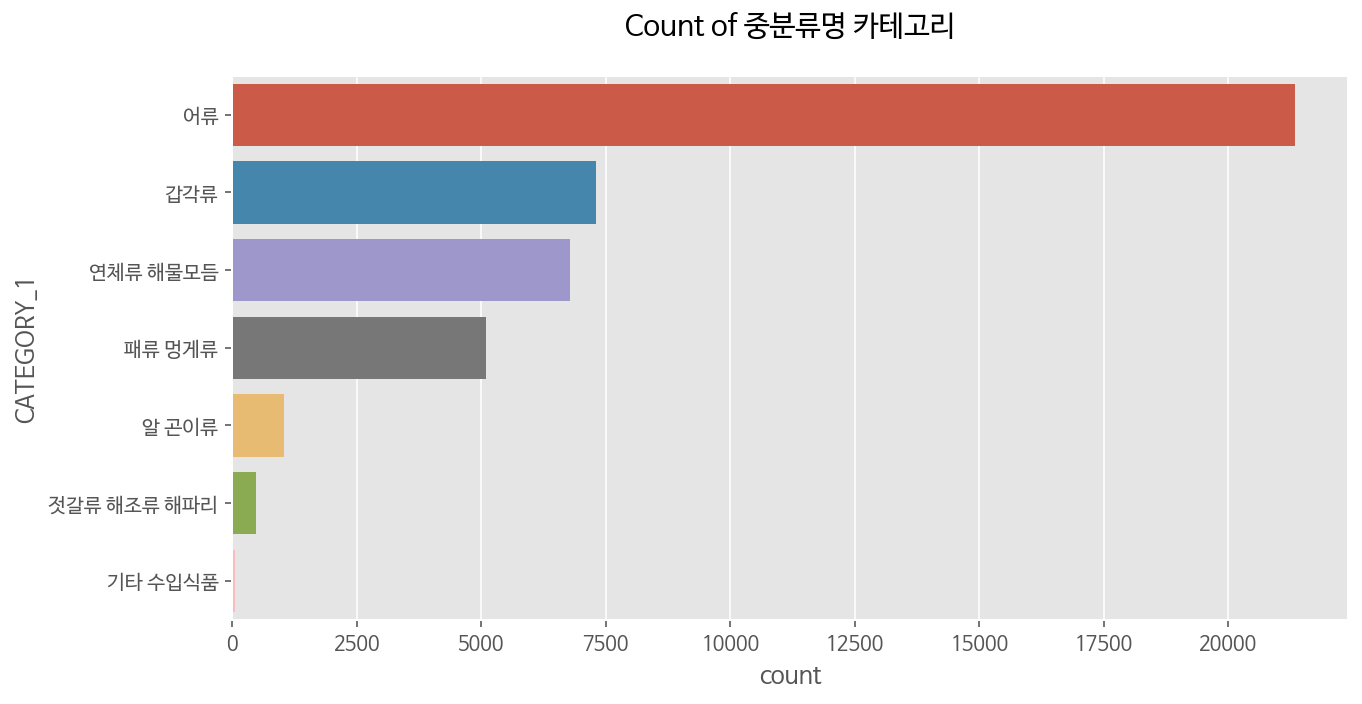

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Count of 중분류명 카테고리', pad= 20)
sns.countplot(data =train_data,y='CATEGORY_1',order = CATEGORY_1.index)
plt.show()

In [ ]:
CATEGORY_2 = train_data['CATEGORY_2'].value_counts()
CATEGORY_2

새우         4141
참치 새치류     3159
오징어        2662
게          2477
연어         1905
           ... 
은민대구알         1
김             1
가물치           1
물메기(곰치)       1
다시마           1
Name: CATEGORY_2, Length: 113, dtype: int64

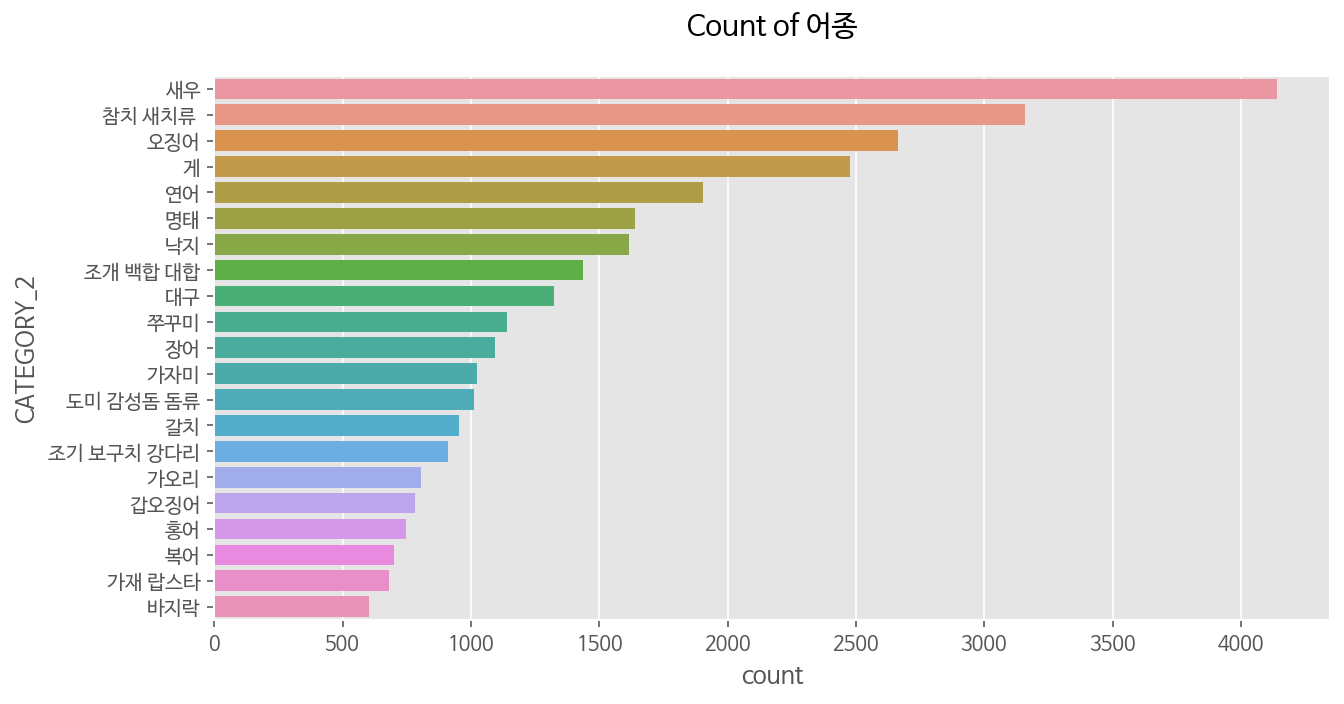

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Count of 어종', pad= 20)
sns.countplot(data =train_data,y='CATEGORY_2',order = CATEGORY_2.index[0:21])
plt.show()

In [ ]:
P_IMPOT_TYRE = train_data['P_IMPORT_TYPE'].value_counts()
P_IMPOT_TYRE

냉동                13568
활                  8280
냉장                 4682
냉동,살,자숙            1431
냉동,살               1044
                  ...  
냉동,개아지살,살,포장횟감        2
자숙,건조                 1
냉동,자숙,절단,횟감           1
냉장,간                  1
건조,지느러미,자숙            1
Name: P_IMPORT_TYPE, Length: 78, dtype: int64

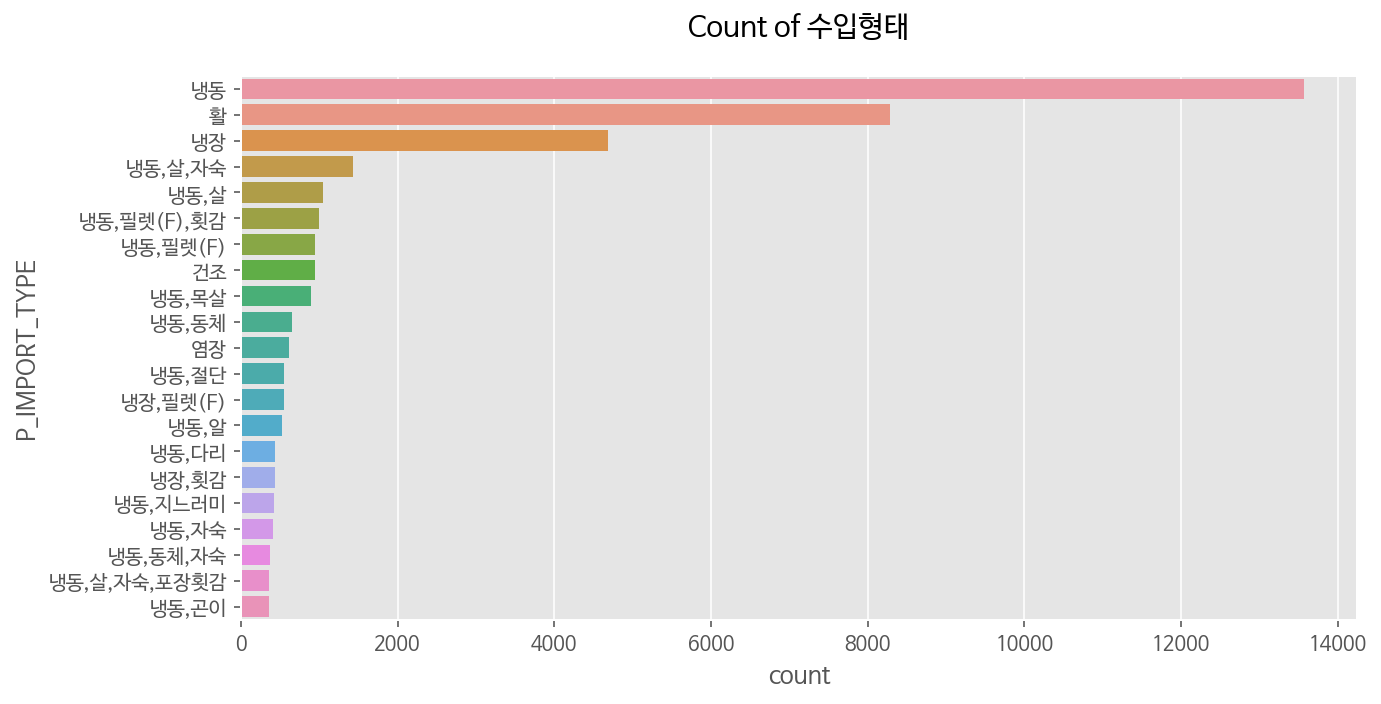

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Count of 수입형태', pad= 20)
sns.countplot(data =train_data,y='P_IMPORT_TYPE',order = P_IMPOT_TYRE.index[0:21])
plt.show()

In [ ]:
train_data['P_IMPORT_TYPE'].unique()

array(['냉동', '냉동,절단', '건조,자숙', '냉동,살,자숙', '냉동,살', '냉장,살', '염장,살',
       '냉동,한쪽껍질붙은', '활', '냉장', '냉동,목살', '냉동,목살,횟감', '염장', '냉동,알',
       '냉동,필렛(F),횟감', '냉동,포장횟감,필렛(F)', '냉동,동체', '냉동,창난', '냉동,살,포장횟감',
       '냉동,자숙,포장횟감', '건조', '냉동,다리,포장횟감', '냉장,필렛(F)', '냉동,자숙,한쪽껍질붙은',
       '냉동,필렛(F)', '냉동,살,자숙,포장횟감', '냉장,횟감', '냉동,다리', '냉동,슬라이스(S),포장횟감',
       '냉장,포장횟감,필렛(F)', '냉동,동체,자숙', '냉동,지느러미', '냉장,필렛(F),횟감', '냉동,곤이',
       '냉동,머리', '자숙,건조', '냉동,슬라이스(S),자숙,포장횟감', '냉동,슬라이스(S)', '냉동,자숙',
       '냉동,자숙,절단', '냉동,간', '건조,알,캐비아대용', '냉동,볼살', '냉동,볼살,횟감', '냉동,개아지살,살',
       '냉동,내장', '냉동,턱살', '냉동,집게다리', '냉동,외투막,살', '냉동,다리,자숙', '냉동,지느러미,자숙',
       '냉동,머리살,횟감', '건조,필렛(F)', '절단,건조', '냉동,개아지살,살,포장횟감', '건조,살,자숙',
       '냉동,턱살,횟감', '냉동,알,캐비아대용', '냉동,살,슬라이스(S),포장횟감', '냉동,머리살',
       '냉동,자숙,절단,횟감', '염장,알,캐비아대용', '건조,훈제', '냉동,동체,포장횟감', '냉동,횟감',
       '냉동,개아지살,살,횟감', '냉장,개아지살,살', '냉동,슬라이스(S),자숙', '냉동,난포선',
       '냉동,동체,자숙,포장횟감', '냉동,머리_외화획득용', '냉장,간', '줄기,염장', '건조,껍질',
       '냉동,다리,자숙,포장횟감', '냉동,꼬리_외화획득용'

In [ ]:
train_data['P_NAME'].unique()

array(['아르헨티나붉은새우', '꽃게', '해삼', '서대', '은밀복', '옥돔', '까치복', '흰다리새우', '바지락',
       '가리비', '개조개', '문어', '주꾸미', '멍게', '대서양참다랑어', '파타고니아이빨고기', '낙지',
       '눈다랑어', '가오리', '미역', '뱀장어', '참다랑어', '대서양연어', '대구', '명태알', '대게',
       '줄민태', '홍서대', '위고둥', '꽁치', '황새치', '틸라피아', '오징어', '기름치', '바다가재',
       '까지가자미', '홍어', '먹장어', '명태', '홍다리얼룩새우', '화살오징어', '청상아리', '붕어',
       '감성돔', '자주복', '꼬막', '재첩', '피조개', '피뿔고둥', '능성어', '준치', '참돔', '연어',
       '왕게', '장문볼락', '각시가자미', '가자미', '털게', '해파리', '새우', '민밀복', '젓새우',
       '홍합', '백합,MERCENARIA MERCENARIA', '새꼬리민태알', '붕장어', '갈치', '밴댕이',
       '갑오징어', '성게알', '동자개', '코토니', '병어', '이스라엘잉어', '영상가이석태', '스피노잠',
       '새꼬막', '농어', '아귀', '긴가이석태', '방어', '고등어', '흑밀복', '홍민어', '북방대합',
       '백합', '황돔', '미꾸라지', '가무락조개', '부세', '줄비늘치', '개불', '비단조개', '깜장북방대합',
       '참조기', '비너스백합', '민들조개', '주름백합', '아담스백합', '은연어', '민어', '옥두어', '민꽃게',
       '골뱅이', '민물새우', '게', '임연수어', '해물혼합', '식용자라', '흑기흉상어', 'PANGASIUS메기',
       '보리멸', '마소치가자미', '귀상어', '동죽', '남방참다랑어', '송어', '적새우', '잉어', '

In [ ]:
train_data['P_NAME'].value_counts()

흰다리새우      2601
오징어        2150
명태         1640
낙지         1617
연어         1489
           ... 
물메기           1
회초리꼬리민태       1
대두이석태         1
청각            1
쿠자조기          1
Name: P_NAME, Length: 286, dtype: int64

In [ ]:
train_data['P_PURPOSE'].value_counts()

판매용         39278
자사제품제조용      1726
외화획득용 원료      911
합작            144
반송품(기타)        14
Name: P_PURPOSE, dtype: int64

In [ ]:
P_NAME=train_data.groupby('P_NAME')['P_PRICE'].agg(**{'P_NAME mean price':'mean'}).reset_index()
PNAME_MEAN=P_NAME.sort_values(by=['P_NAME mean price'], axis=0,ascending=False)
PNAME_MEAN

P_NAME  P_NAME mean price
238   청새리상어         229.380948
159     성게알         139.730706
33      금눈돔         105.159426
265      해삼          73.410829
150      상어          67.792968
..      ...                ...
206  장성베도라치           0.799846
103     물메기           0.650000
217     정어리           0.602548
165    스피노잠           0.515048
208      재첩           0.500541

[286 rows x 2 columns]

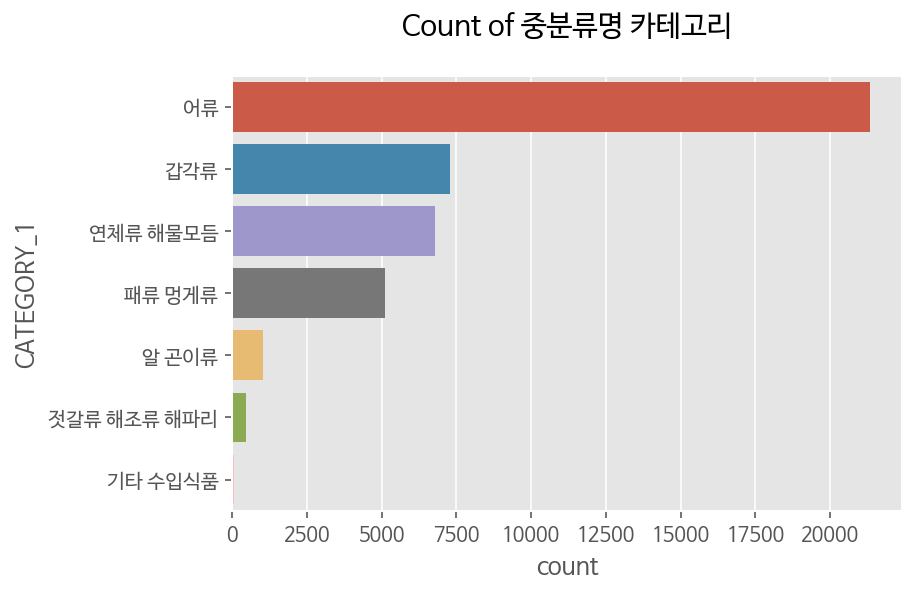

In [ ]:
plt.title('Count of 중분류명 카테고리', pad= 20)
sns.countplot(data =train_data,y='CATEGORY_1',order = CATEGORY_1.index)
plt.show()

In [ ]:
train_data['IMPORT_1']=""
for i in train_data.index:
    if "," in train_data['P_IMPORT_TYPE'][i]:
        train_data['IMPORT_1'][i]=train_data['P_IMPORT_TYPE'][i].split(",")[0]
    else:
        train_data['IMPORT_1'][i]=train_data['P_IMPORT_TYPE'][i]
    i=i+1

train_data['IMPORT_1'].unique()

array(['냉동', '건조', '냉장', '염장', '활', '자숙', '절단', '줄기'], dtype=object)

In [ ]:
salmon = train_data[train_data['CATEGORY_2'] == "연어"] 
salmon=salmon[salmon['P_NAME'] == "연어"]
salmon = salmon.sort_values(by=['P_PRICE'], axis=0 ,ascending =False)
P_IMPORT_TYRE_salmon = salmon['P_IMPORT_TYPE'].value_counts()
IMPORT_TYRE_salmon = salmon['IMPORT_1'].value_counts()

In [ ]:
salmon = train_data[train_data['CATEGORY_2'] == "연어"] 
salmon=salmon[salmon['P_NAME'] == "연어"]
salmon = salmon.sort_values(by=['P_PRICE'], axis=0 ,ascending =False)
P_IMPORT_TYRE_salmon = salmon['P_IMPORT_TYPE'].value_counts()
squid = train_data[train_data['CATEGORY_2'] == "오징어"] 
squid=squid[squid['P_NAME'] == "오징어"]
P_IMPORT_TYRE_squid = squid['P_IMPORT_TYPE'].value_counts()
shrimp = train_data[train_data['CATEGORY_2'] == "새우"]
shrimp= shrimp[shrimp['P_NAME']== "흰다리새우"]
P_IMPORT_TYRE_shrimp = shrimp['P_IMPORT_TYPE'].value_counts()

In [ ]:
 squid = train_data[train_data['CATEGORY_2'] == "오징어"] 
 squid=squid[squid['P_NAME'] == "오징어"]
 P_IMPORT_TYRE_squid = squid['P_IMPORT_TYPE'].value_counts()
 IMPORT_TYRE_squid = squid['IMPORT_1'].value_counts()

In [ ]:
shrimp = train_data[train_data['CATEGORY_2'] == "새우"]
shrimp= shrimp[shrimp['P_NAME']== "흰다리새우"]
P_IMPORT_TYRE_shrimp = shrimp['P_IMPORT_TYPE'].value_counts()
IMPORT_TYRE_shrimp = shrimp['IMPORT_1'].value_counts()

In [ ]:
target_data=pd.concat([salmon,squid,shrimp])
target_data.head()

REG_DATE P_TYPE CTRY_1 CTRY_2  ... P_NAME P_IMPORT_TYPE    P_PRICE IMPORT_1
14240 2017-05-15    수산물   노르웨이   노르웨이  ...     연어      냉장,필렛(F)  62.457202       냉장
15859 2017-07-10    수산물   노르웨이   노르웨이  ...     연어      냉장,필렛(F)  52.263797       냉장
14834 2017-06-05    수산물   노르웨이   노르웨이  ...     연어      냉장,필렛(F)  51.394008       냉장
15663 2017-07-03    수산물   노르웨이   노르웨이  ...     연어      냉장,필렛(F)  50.173407       냉장
14444 2017-05-22    수산물   노르웨이   노르웨이  ...     연어      냉장,필렛(F)  49.777500       냉장

[5 rows x 11 columns]

In [ ]:
target_data.shape

(6240, 11)

In [ ]:
shrimp['P_IMPORT_TYPE'].value_counts()

냉동              745
냉동,살            615
냉동,살,자숙,포장횟감    361
냉동,살,자숙         358
냉동,살,포장횟감       190
냉장              172
냉동,자숙           160
Name: P_IMPORT_TYPE, dtype: int64

In [ ]:
target_data['P_NAME'].value_counts()

흰다리새우    2601
오징어      2150
연어       1489
Name: P_NAME, dtype: int64

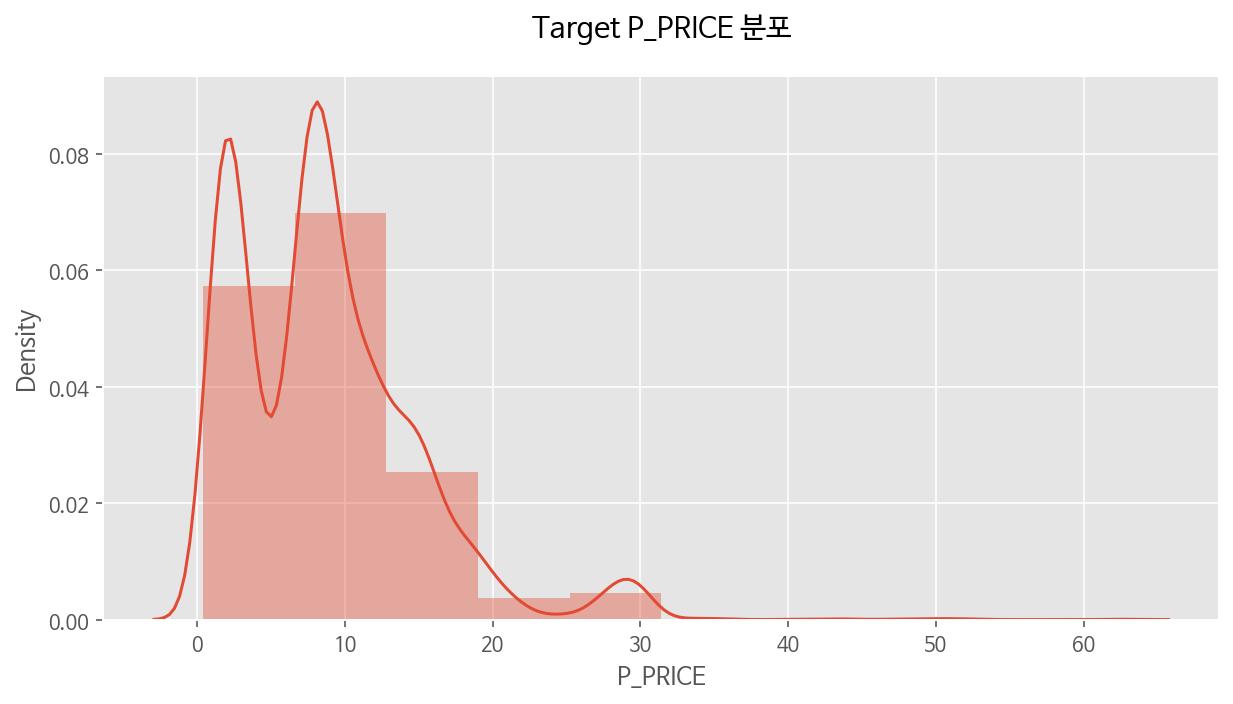

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Target P_PRICE 분포", pad= 20)
sns.distplot(target_data['P_PRICE'],bins=10)

연어 오징어 그리고 새우만 남은 데이터는 총 7168개

In [ ]:
different_data=target_data[target_data['CTRY_1'] != target_data['CTRY_2'] ]

In [ ]:
target_data.shape

(6240, 11)

In [ ]:
different_data.shape

(119, 11)

제조국과 수출국이 다른 데이터는 target data 에서 159개 159개 데이터를 분석에서 우선 제외 

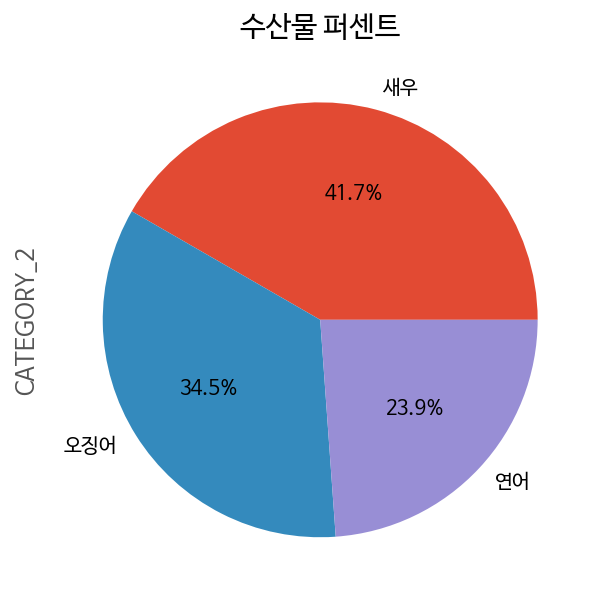

In [ ]:
plt.figure(figsize=(5,5))
plt.title("수산물 퍼센트")
target_data['CATEGORY_2'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

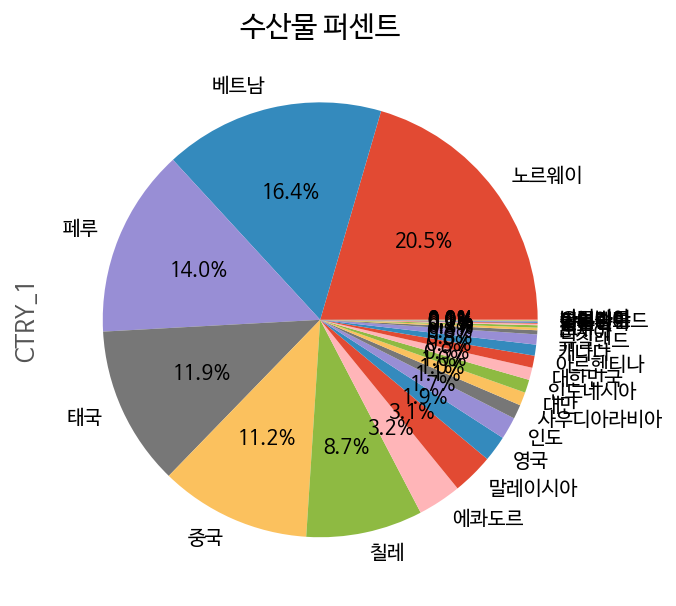

In [ ]:
plt.figure(figsize=(5,5))
plt.title("수산물 퍼센트")
target_data['CTRY_1'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

오징어가 37.1 % 새우가 36.3 % 연어 26.6 % 로 확인 가능

In [ ]:
sa=salmon['CTRY_1'].value_counts()
sq=squid['CTRY_1'].value_counts()
sh=shrimp['CTRY_1'].value_counts()

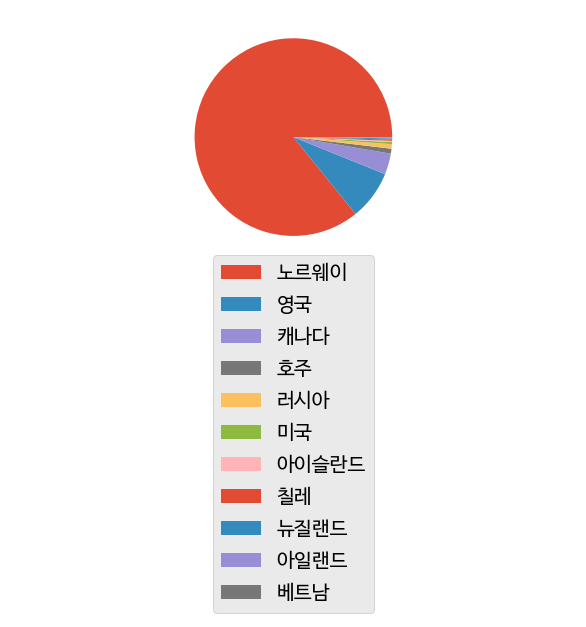

In [ ]:
fig = plt.figure(11, figsize=(5,5))
ax =fig.add_subplot(2,1,1)
ax.axis("equal")
labels=sa.index

pie = ax.pie(sa,startangle=0)
ax2=fig.add_subplot(2,1,2)
ax2.axis("off") 
ax2.legend(pie[0],labels, loc="center")
plt.show()

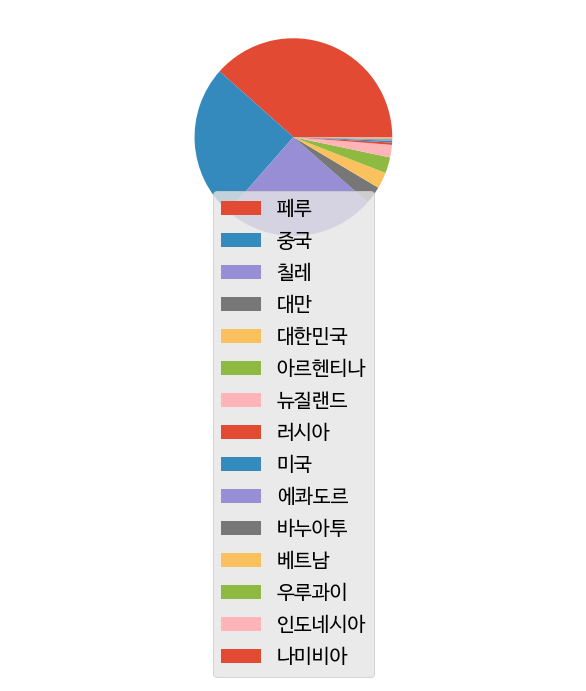

In [ ]:
fig = plt.figure(11, figsize=(5,5))
ax =fig.add_subplot(2,1,1)
ax.axis("equal")
labels=sq.index

pie = ax.pie(sq,startangle=0)
ax2=fig.add_subplot(2,1,2)
ax2.axis("off") 
ax2.legend(pie[0],labels, loc="center")

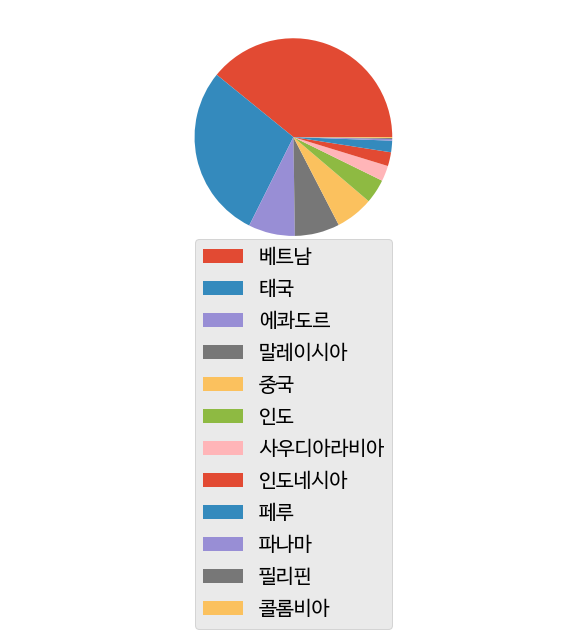

In [ ]:
fig = plt.figure(11, figsize=(5,5))
ax =fig.add_subplot(2,1,1)
ax.axis("equal")
labels=sh.index

pie = ax.pie(sh,startangle=0)
ax2=fig.add_subplot(2,1,2)
ax2.axis("off") 
ax2.legend(pie[0],labels, loc="center")

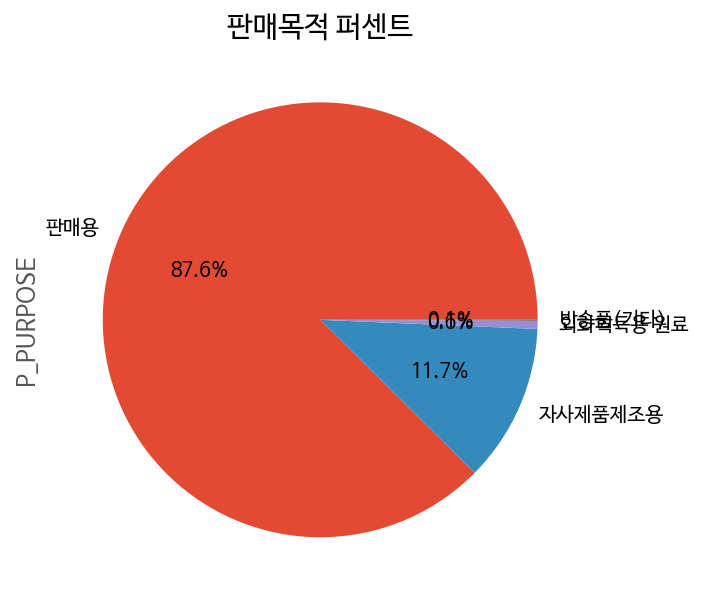

In [ ]:
plt.figure(figsize=(5,5))
plt.title("판매목적 퍼센트")
target_data['P_PURPOSE'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

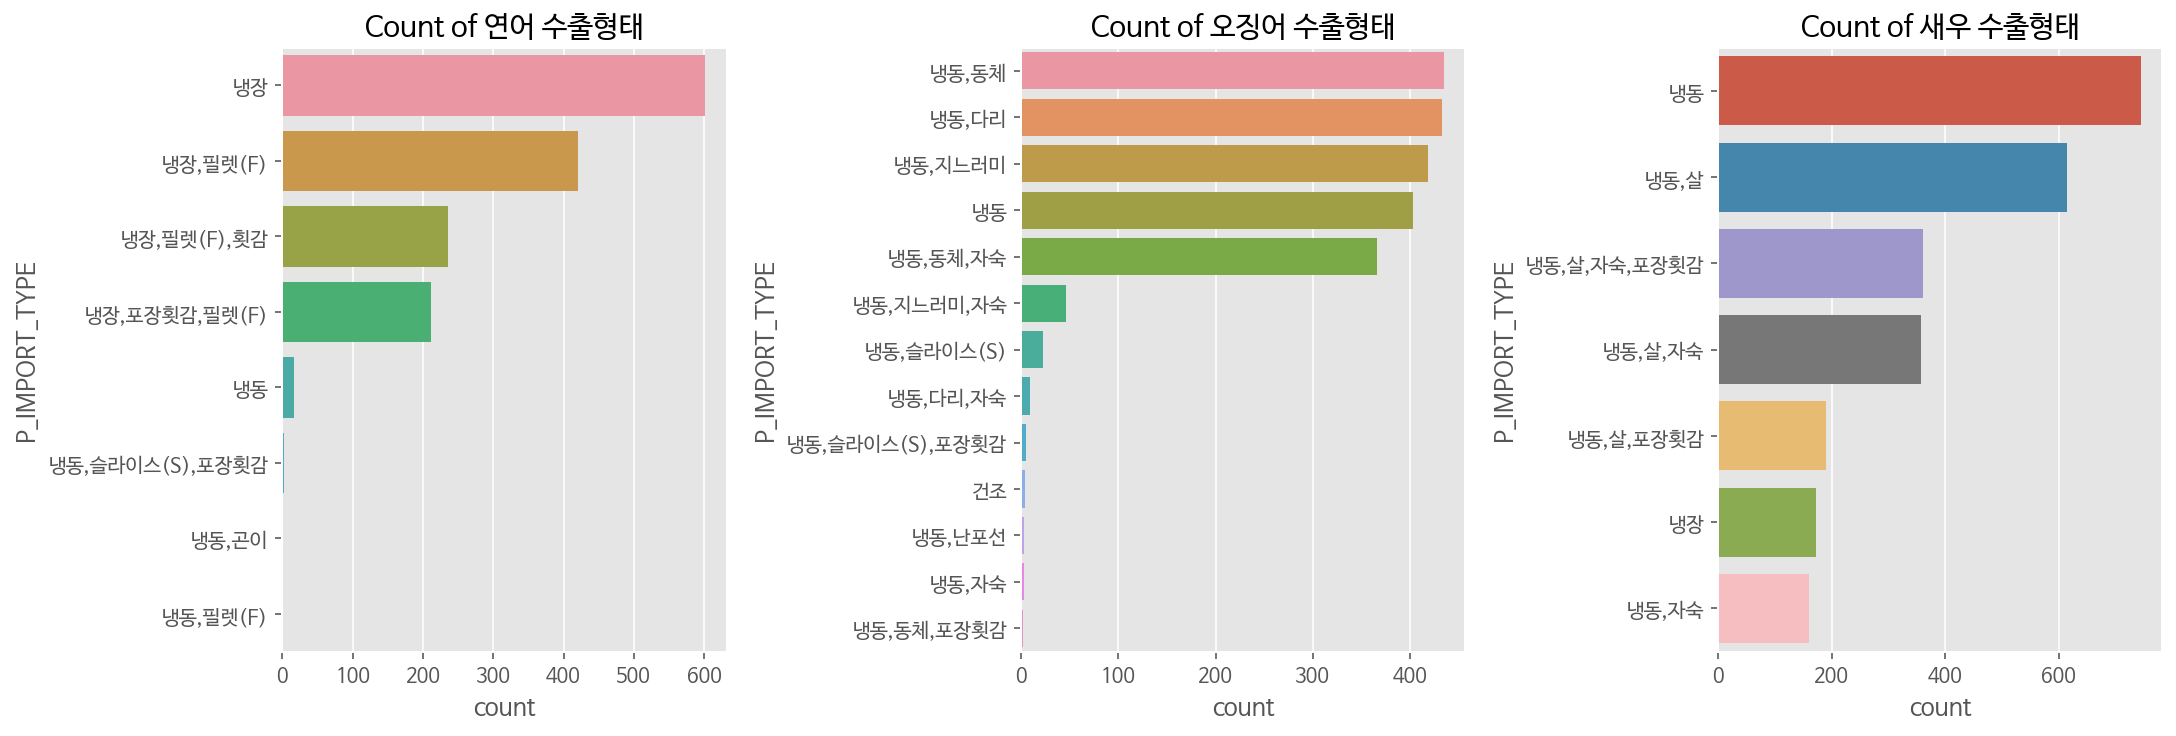

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=False,constrained_layout=True)
sns.countplot(data=salmon,y='P_IMPORT_TYPE',order=P_IMPORT_TYRE_salmon.index,ax=axes[0])
axes[0].set_title("Count of 연어 수출형태")
sns.countplot(data=squid,y='P_IMPORT_TYPE',order=P_IMPORT_TYRE_squid.index,ax=axes[1])
axes[1].set_title("Count of 오징어 수출형태")
sns.countplot(data=shrimp,y='P_IMPORT_TYPE',order=P_IMPORT_TYRE_shrimp.index,ax=axes[2])
axes[2].set_title("Count of 새우 수출형태")
plt.show()

연어의경우 냉장으로 가장 많이 수출이 되며  오징어와 새우는 냉동 수출이 많음

In [ ]:
SALMON_MEAN = salmon.groupby('P_IMPORT_TYPE')['P_PRICE'].agg(**{'P_IMPORT_TYPE mean price':'mean'}).reset_index()
SALMON_MEAN=SALMON_MEAN.sort_values(by=['P_IMPORT_TYPE mean price'], axis=0,ascending=False)
SQUID_MEAN = squid.groupby('P_IMPORT_TYPE')['P_PRICE'].agg(**{'P_IMPORT_TYPE mean price':'mean'}).reset_index()
SQUID_MEAN=SQUID_MEAN.sort_values(by=['P_IMPORT_TYPE mean price'], axis=0,ascending=False)
SHRIMP_MEAN = shrimp.groupby('P_IMPORT_TYPE')['P_PRICE'].agg(**{'P_IMPORT_TYPE mean price':'mean'}).reset_index()
SHRIMP_MEAN=SHRIMP_MEAN.sort_values(by=['P_IMPORT_TYPE mean price'], axis=0,ascending=False)

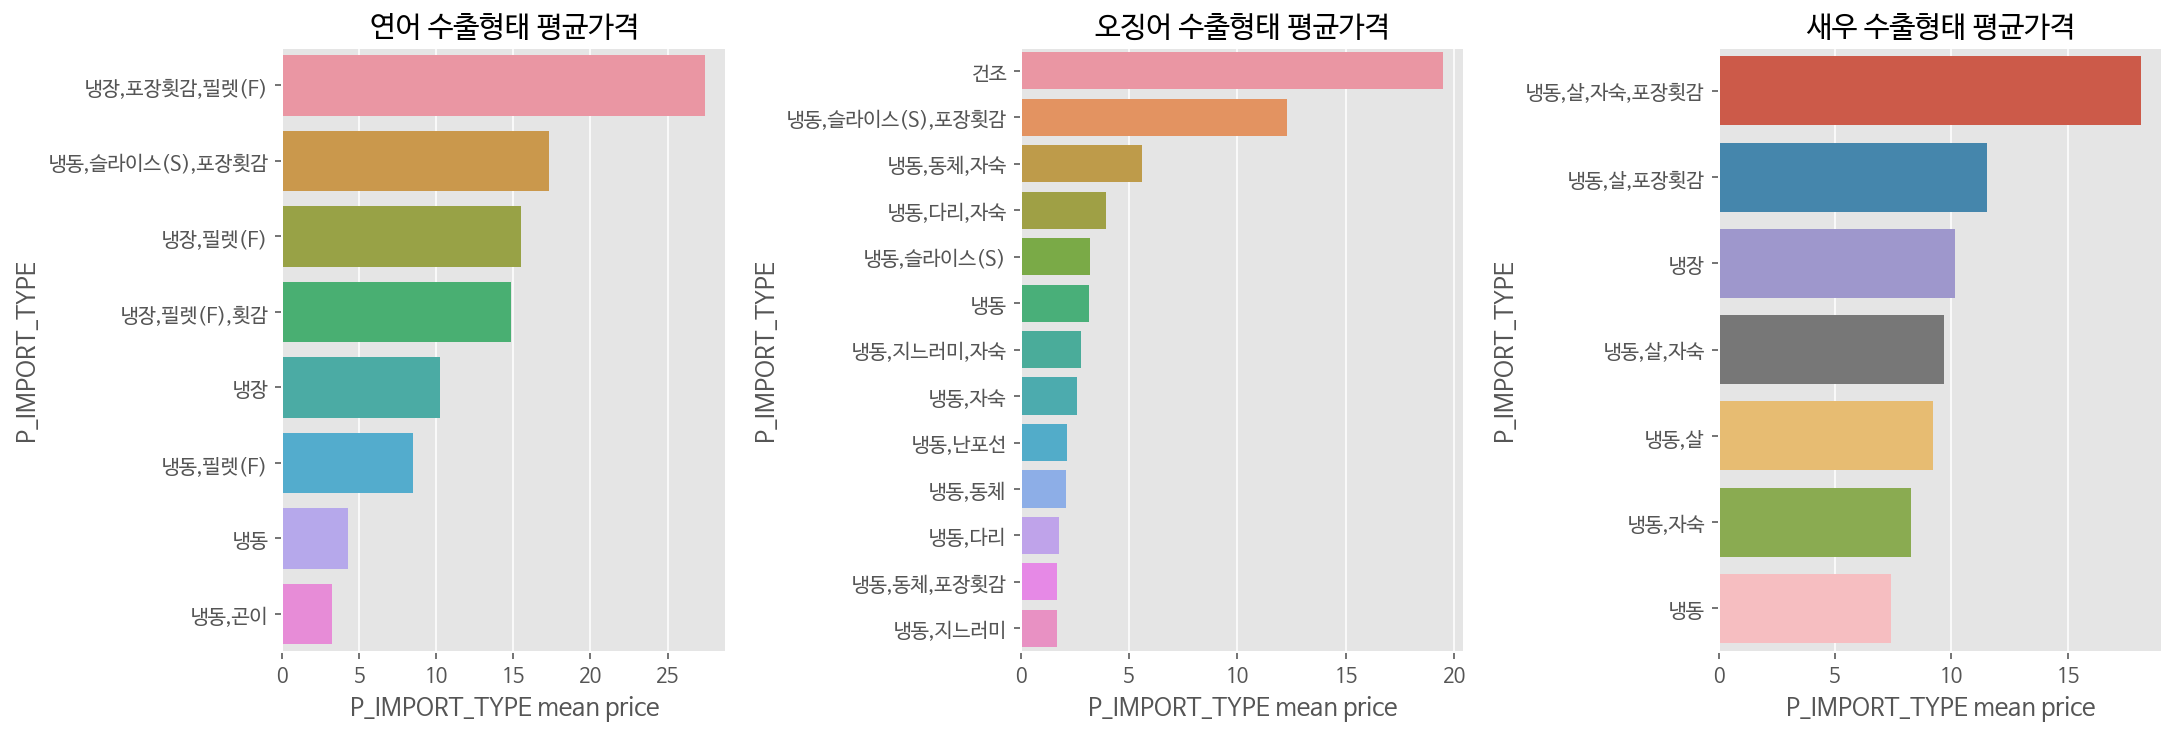

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=False,constrained_layout=True)
sns.barplot(data = SALMON_MEAN, y='P_IMPORT_TYPE', x='P_IMPORT_TYPE mean price',ax=axes[0])
axes[0].set_title("연어 수출형태 평균가격")
sns.barplot(data = SQUID_MEAN, y='P_IMPORT_TYPE', x='P_IMPORT_TYPE mean price',ax=axes[1])
axes[1].set_title("오징어 수출형태 평균가격")
sns.barplot(data = SHRIMP_MEAN, y='P_IMPORT_TYPE', x='P_IMPORT_TYPE mean price',ax=axes[2])
axes[2].set_title("새우 수출형태 평균가격")
plt.show()

In [ ]:
SALMON_MEAN1 = salmon.groupby('IMPORT_1')['P_PRICE'].agg(**{'IMPORT_1 mean price':'mean'}).reset_index()
SALMON_MEAN1=SALMON_MEAN1.sort_values(by=['IMPORT_1 mean price'], axis=0,ascending=False)
SQUID_MEAN1 = squid.groupby('IMPORT_1')['P_PRICE'].agg(**{'IMPORT_1 mean price':'mean'}).reset_index()
SQUID_MEAN1=SQUID_MEAN1.sort_values(by=['IMPORT_1 mean price'], axis=0,ascending=False)
SHRIMP_MEAN1 = shrimp.groupby('IMPORT_1')['P_PRICE'].agg(**{'IMPORT_1 mean price':'mean'}).reset_index()
SHRIMP_MEAN1=SHRIMP_MEAN1.sort_values(by=['IMPORT_1 mean price'], axis=0,ascending=False)

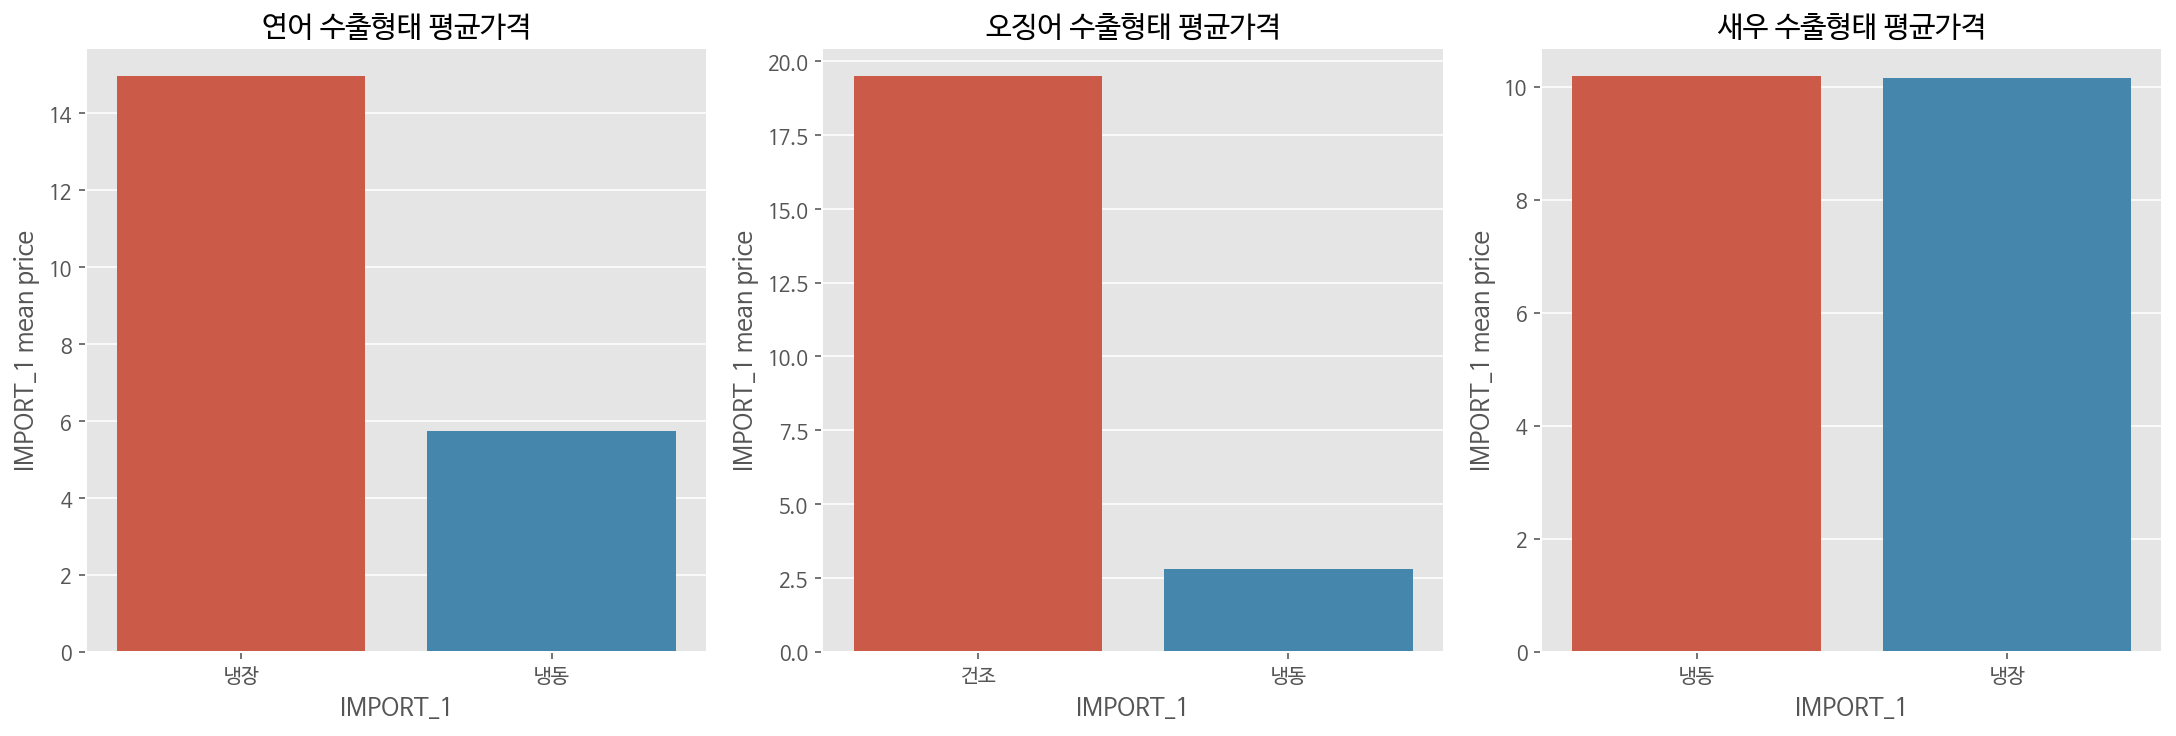

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=False,constrained_layout=True)
sns.barplot(data = SALMON_MEAN1, x='IMPORT_1', y='IMPORT_1 mean price',ax=axes[0])
axes[0].set_title("연어 수출형태 평균가격")
sns.barplot(data = SQUID_MEAN1, x='IMPORT_1', y='IMPORT_1 mean price',ax=axes[1])
axes[1].set_title("오징어 수출형태 평균가격")
sns.barplot(data = SHRIMP_MEAN1, x='IMPORT_1', y='IMPORT_1 mean price',ax=axes[2])
axes[2].set_title("새우 수출형태 평균가격")
plt.show()

연어의경우 냉장 포장횟감 필렛 그리고 

No handles with labels found to put in legend.


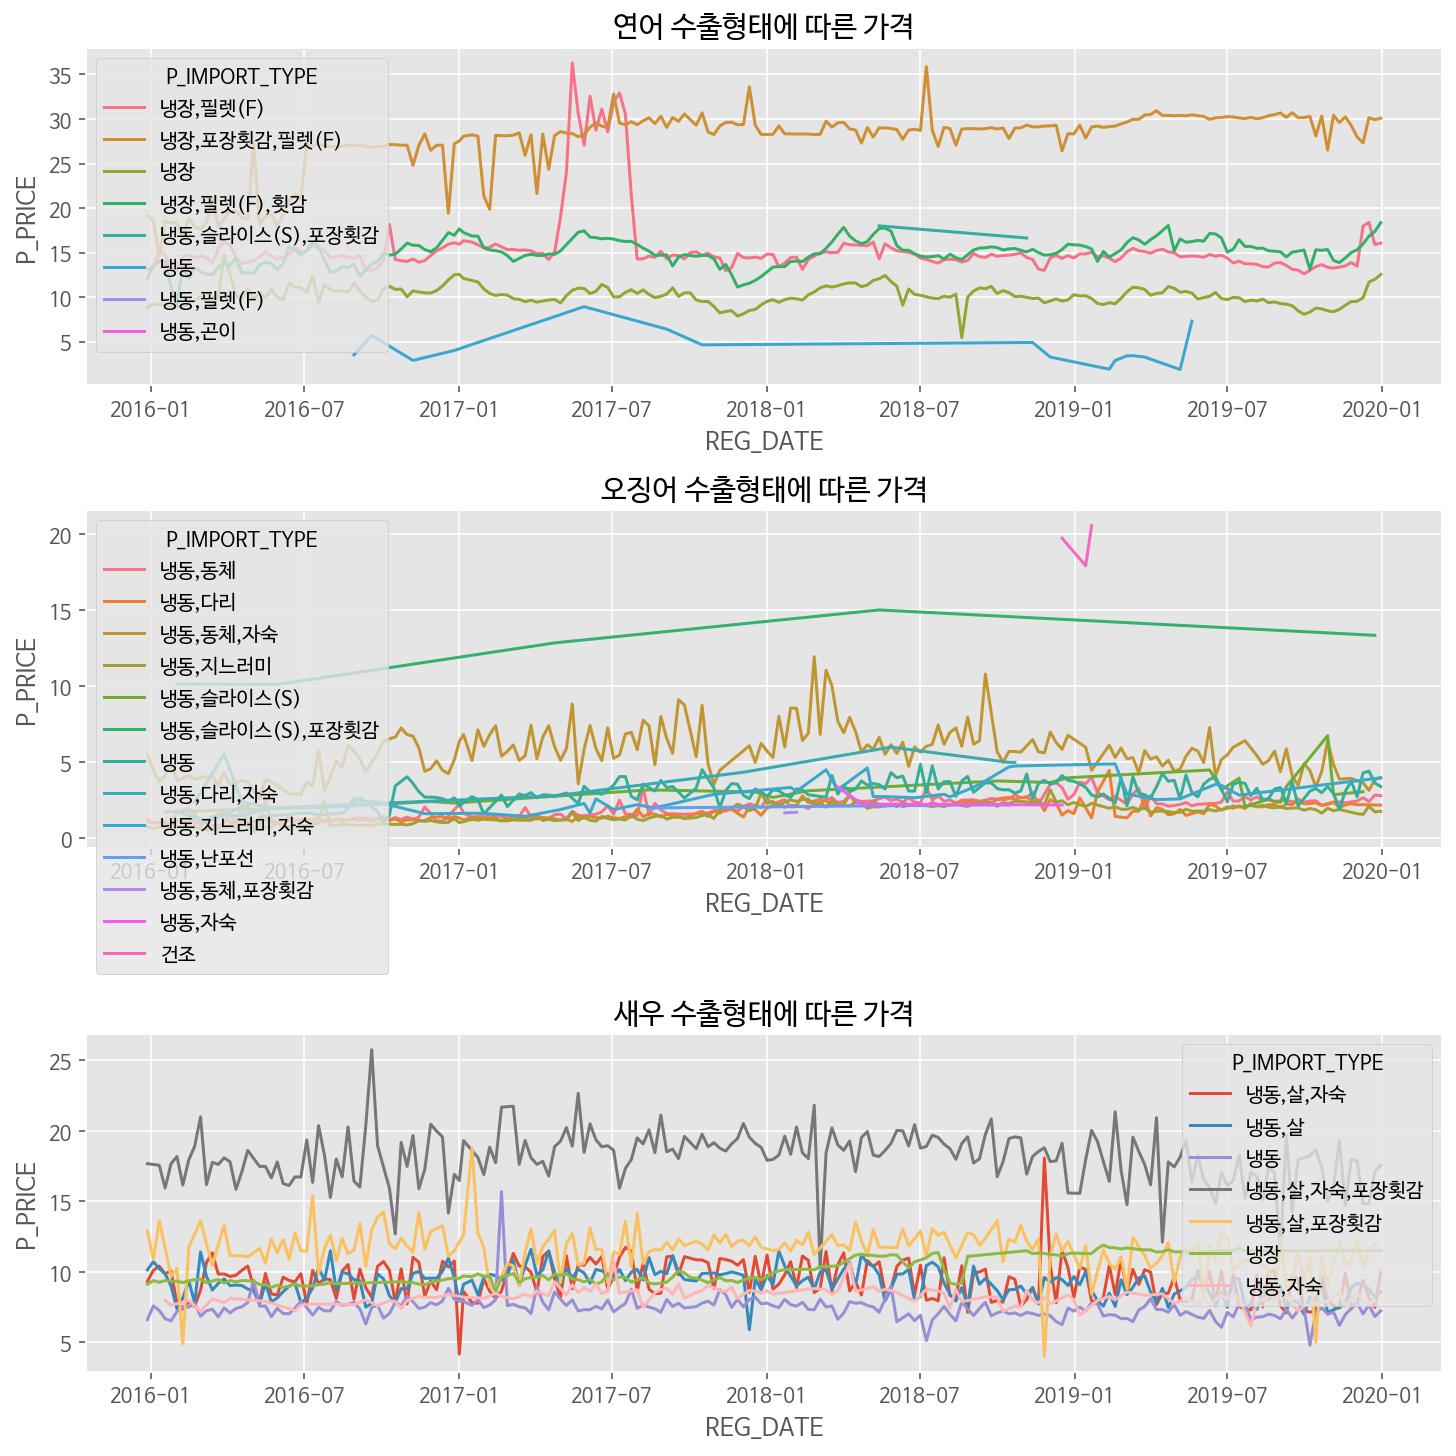

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10,10), sharey=False,constrained_layout=True)
plt.legend(loc='center left', bbox_to_anchor=(10.5, 10.5))
sns.lineplot(data = salmon, x='REG_DATE', y='P_PRICE',hue='P_IMPORT_TYPE',ci=None,ax=axes[0])
sns.lineplot(data = squid, x='REG_DATE', y='P_PRICE',hue='P_IMPORT_TYPE',ci=None,ax=axes[1])
sns.lineplot(data = shrimp, x='REG_DATE', y='P_PRICE',hue='P_IMPORT_TYPE',ci=None,ax=axes[2])
axes[0].set_title("연어 수출형태에 따른 가격")
axes[1].set_title("오징어 수출형태에 따른 가격")
axes[2].set_title("새우 수출형태에 따른 가격")
plt.show()

No handles with labels found to put in legend.


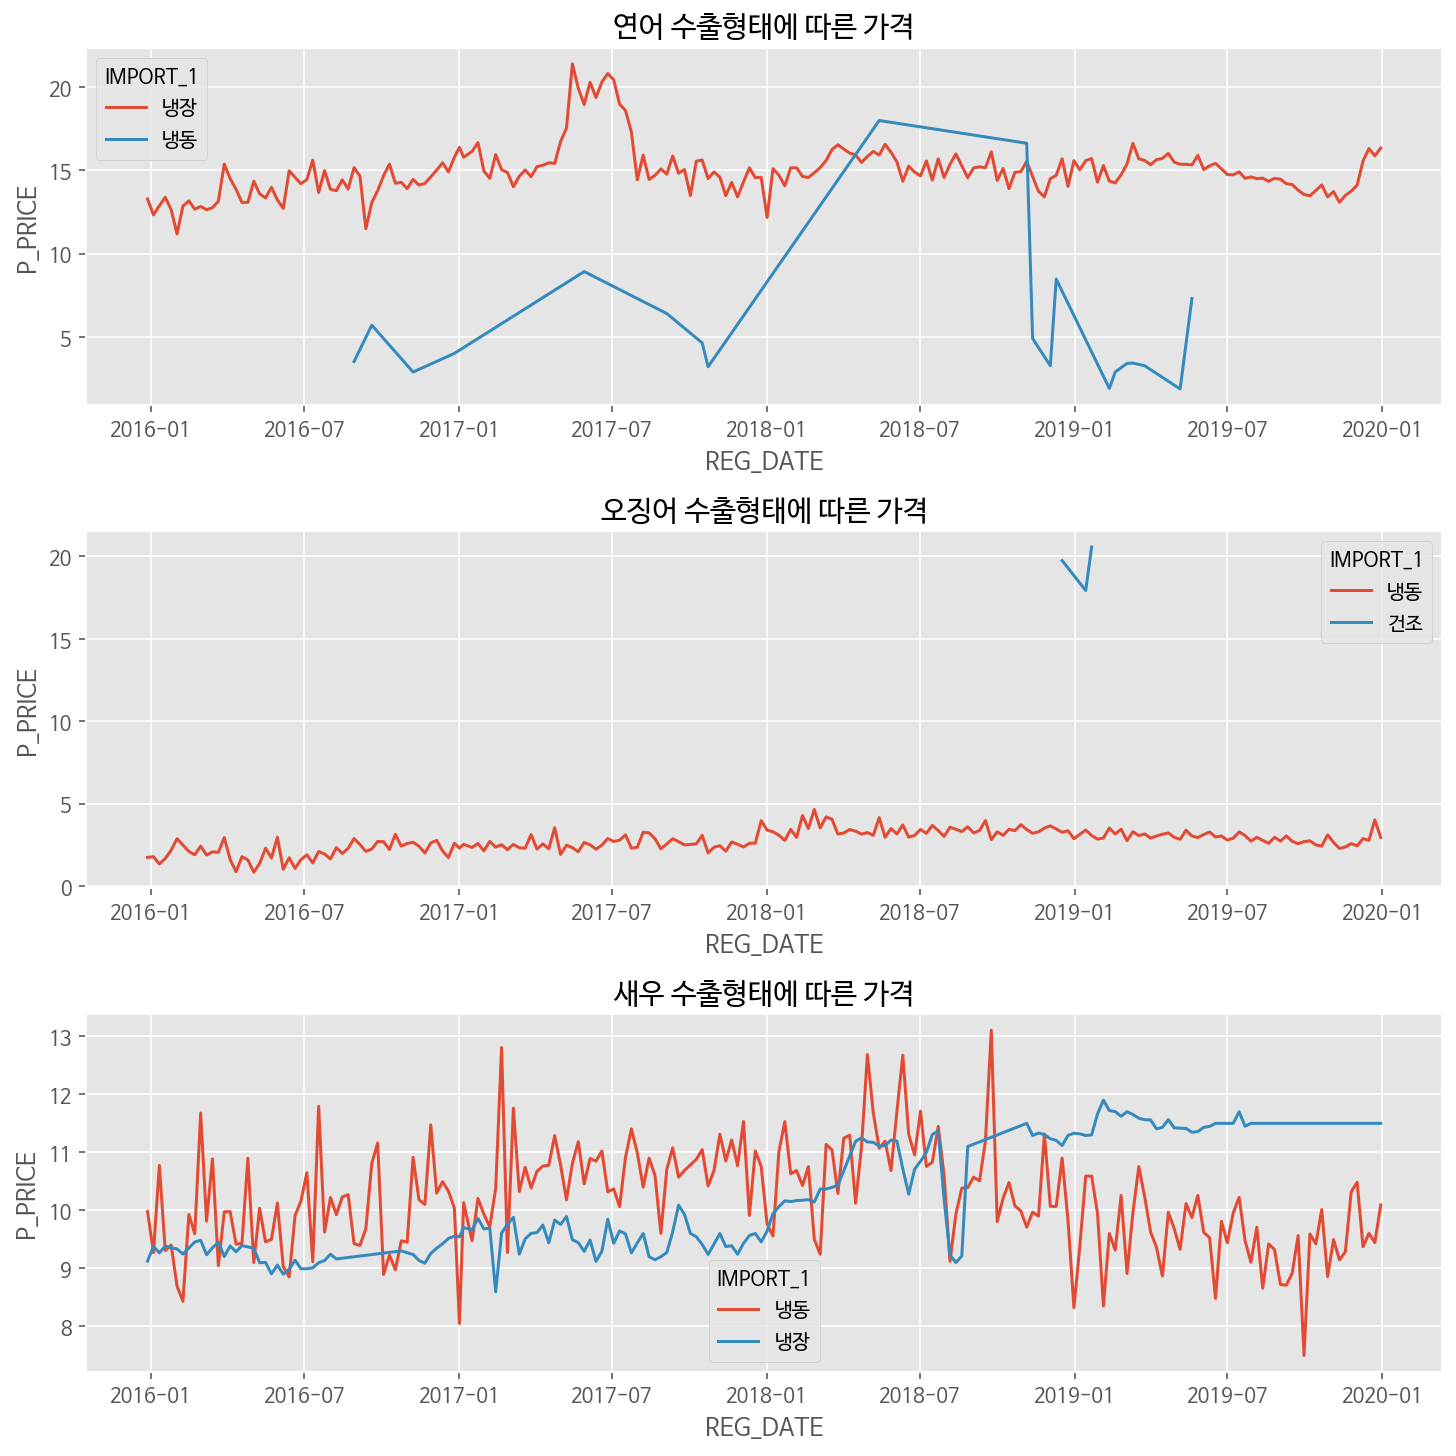

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10,10), sharey=False,constrained_layout=True)
plt.legend(loc='center left', bbox_to_anchor=(10.5, 10.5))
sns.lineplot(data = salmon, x='REG_DATE', y='P_PRICE',hue='IMPORT_1',ci=None,ax=axes[0])
sns.lineplot(data = squid, x='REG_DATE', y='P_PRICE',hue='IMPORT_1',ci=None,ax=axes[1])
sns.lineplot(data = shrimp, x='REG_DATE', y='P_PRICE',hue='IMPORT_1',ci=None,ax=axes[2])
axes[0].set_title("연어 수출형태에 따른 가격")
axes[1].set_title("오징어 수출형태에 따른 가격")
axes[2].set_title("새우 수출형태에 따른 가격")
plt.show()

No handles with labels found to put in legend.


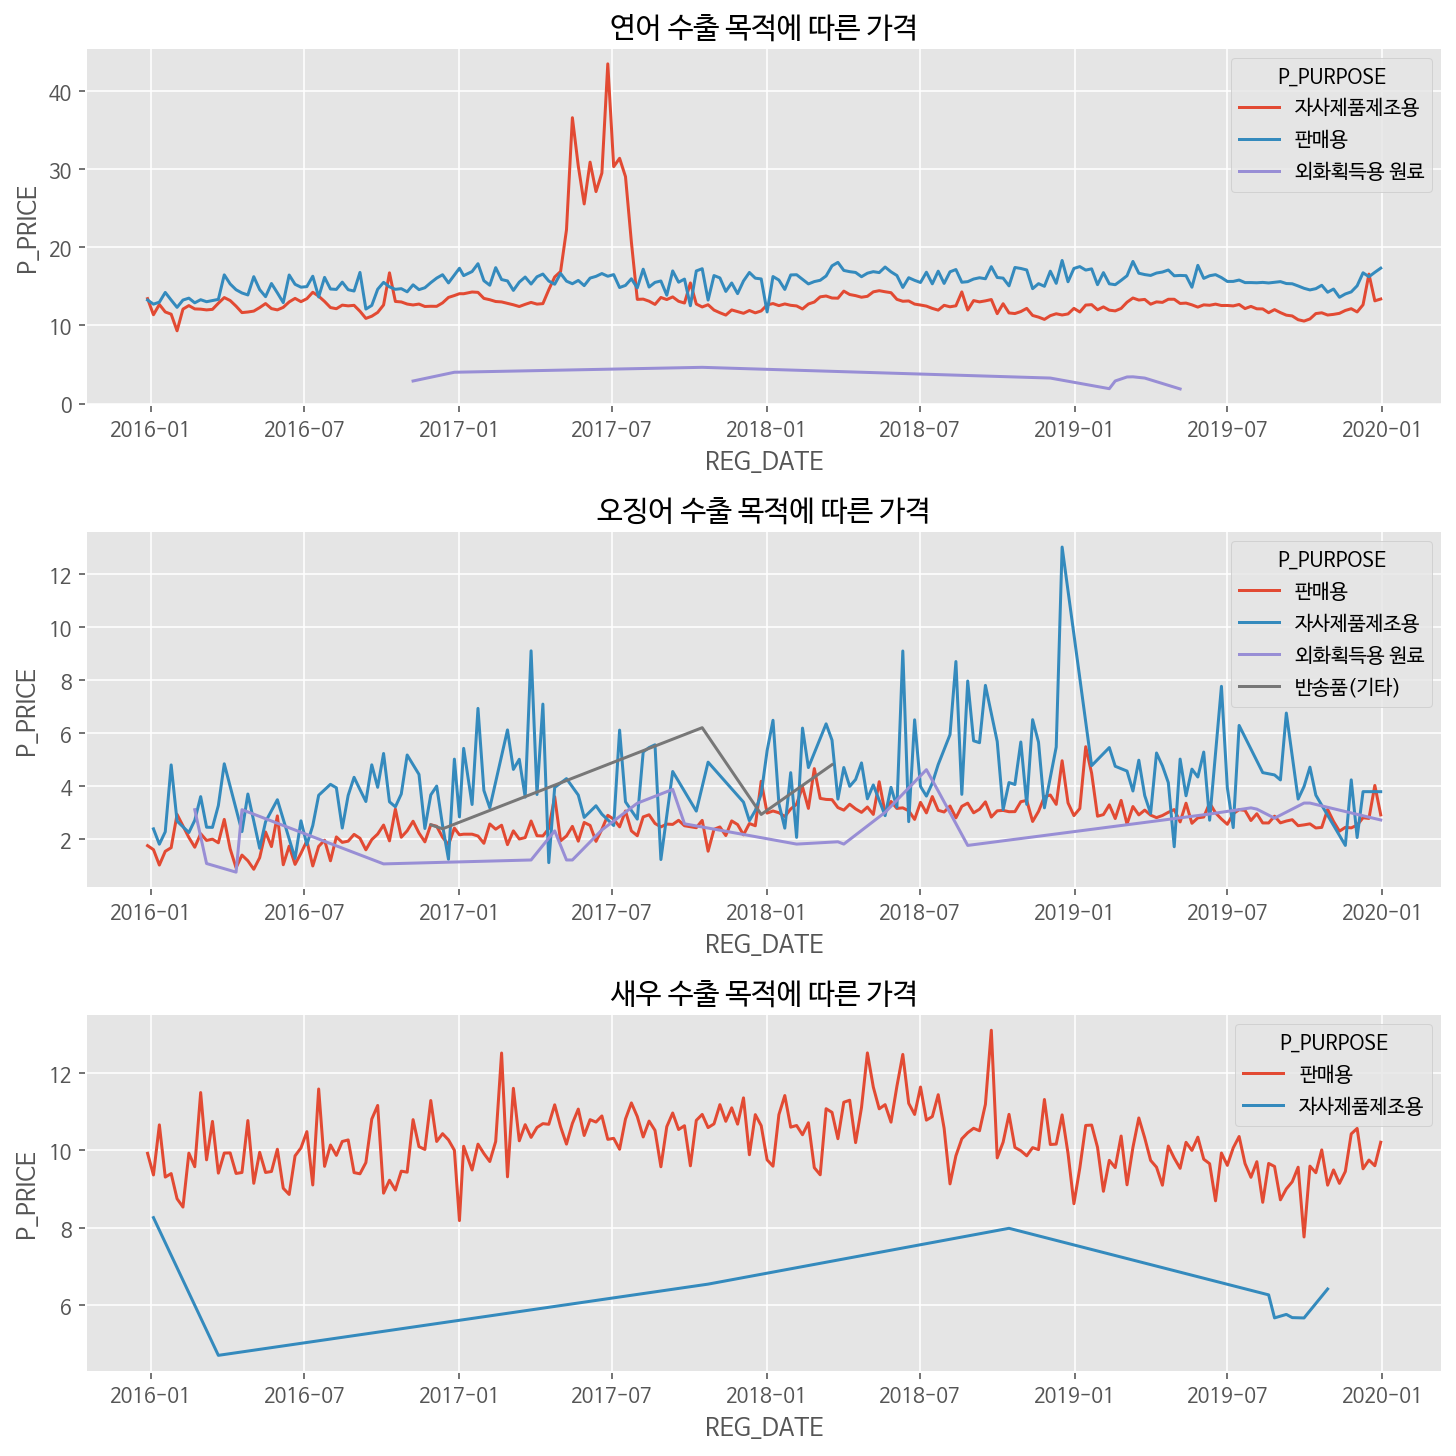

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10,10), sharey=False,constrained_layout=True)
plt.legend(loc='center left', bbox_to_anchor=(10.5, 10.5))
sns.lineplot(data = salmon, x='REG_DATE', y='P_PRICE',hue='P_PURPOSE',ci=None,ax=axes[0])
sns.lineplot(data = squid, x='REG_DATE', y='P_PRICE',hue='P_PURPOSE',ci=None,ax=axes[1])
sns.lineplot(data = shrimp, x='REG_DATE', y='P_PRICE',hue='P_PURPOSE',ci=None,ax=axes[2])
axes[0].set_title("연어 수출 목적에 따른 가격")
axes[1].set_title("오징어 수출 목적에 따른 가격")
axes[2].set_title("새우 수출 목적에 따른 가격")
plt.show()

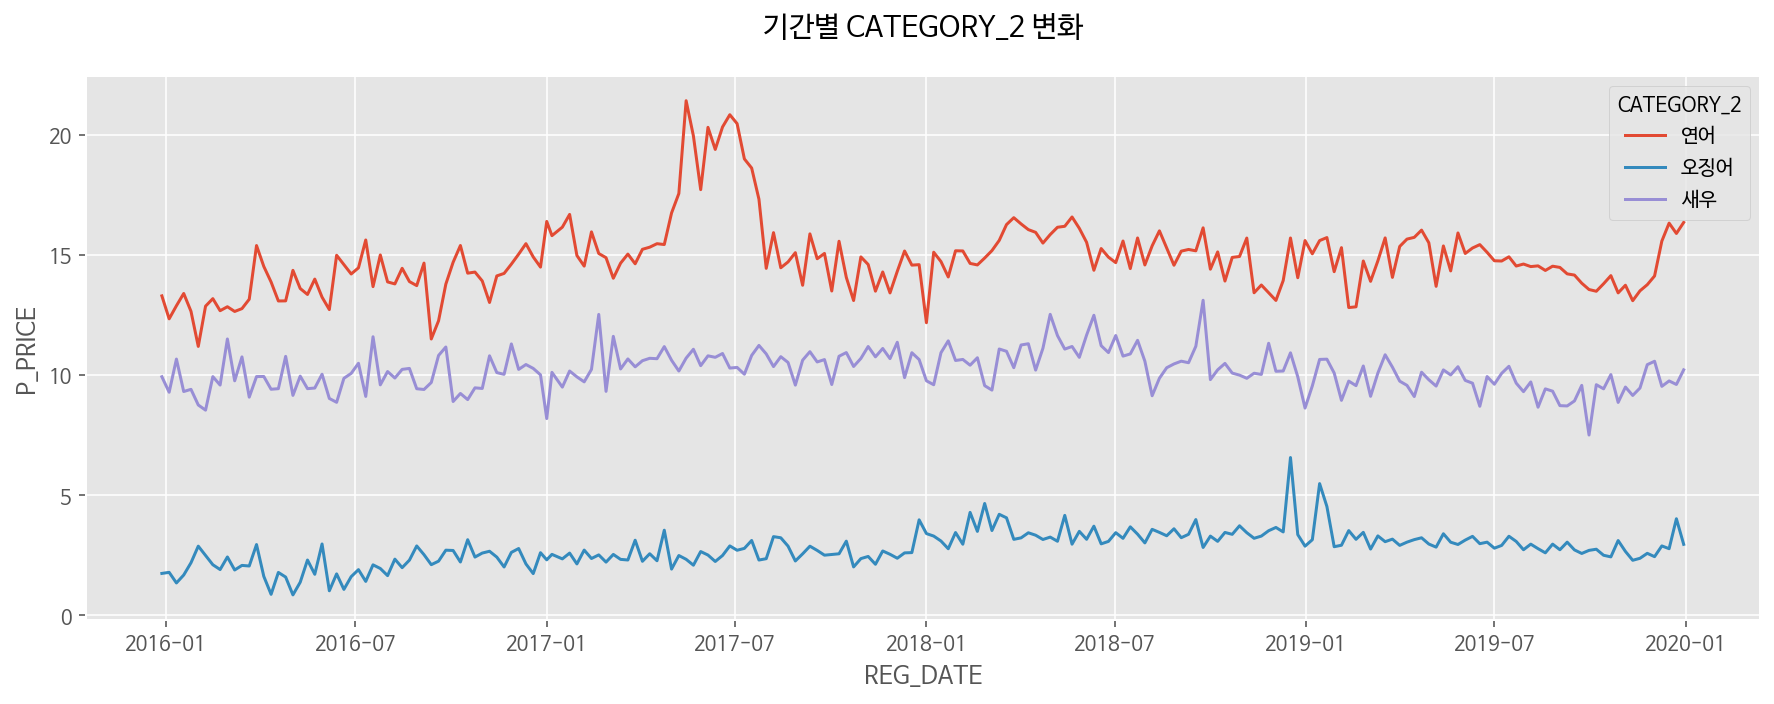

In [ ]:
plt.figure(figsize=(15,5))
plt.title("기간별 CATEGORY_2 변화", pad= 20)
sns.lineplot(data = target_data, x='REG_DATE', y='P_PRICE',hue='CATEGORY_2',ci=None)
plt.show()

In [ ]:
target_data.groupby(['CATEGORY_2','P_IMPORT_TYPE']).mean()

P_PRICE
CATEGORY_2 P_IMPORT_TYPE             
새우         냉동                7.404033
           냉동,살              9.211613
           냉동,살,자숙           9.704063
           냉동,살,자숙,포장횟감     18.162140
           냉동,살,포장횟감        11.547418
           냉동,자숙             8.283375
           냉장               10.160890
연어         냉동                4.265549
           냉동,곤이             3.200000
           냉동,슬라이스(S),포장횟감  17.317565
           냉동,필렛(F)          8.467880
           냉장               10.248517
           냉장,포장횟감,필렛(F)    27.431585
           냉장,필렛(F)         15.497150
           냉장,필렛(F),횟감      14.822066
오징어        건조               19.491195
           냉동                3.167649
           냉동,난포선            2.133333
           냉동,다리             1.753472
           냉동,다리,자숙          3.943801
           냉동,동체             2.110168
           냉동,동체,자숙          5.589666
           냉동,동체,포장횟감        1.698333
           냉동,슬라이스(S)        3.186364
           냉동,슬라이스(S),포장횟감  12.300728
           냉동,자숙             2.607825
           냉동,지느러미           1.674173
           냉동,지느러미,자숙        2.772274

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
cross_tab = pd.crosstab(target_data['CATEGORY_2'],target_data['CTRY_1'],margins=True)

In [ ]:
result=chi2_contingency(observed=cross_tab,correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

1. 카이제곱 통계량: 11435.807628821403
2. p-value: 0.0
3. df: 84


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('P_PRICE ~ C(CTRY_1)', salmon).fit()
anova_lm(model)

df        sum_sq     mean_sq          F        PR(>F)
C(CTRY_1)    10.0   7218.640698  721.864070  18.025187  2.149307e-31
Residual   1478.0  59190.236992   40.047522        NaN           NaN

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(salmon['P_PRICE'], salmon['CTRY_1'], alpha=0.05)
hsd.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('P_PRICE ~ C(P_IMPORT_TYPE)', target_data).fit()
anova_lm(model)


df         sum_sq      mean_sq            F  PR(>F)
C(P_IMPORT_TYPE)    22.0  215042.391659  9774.654166  1783.415713     0.0
Residual          6217.0   34074.514714     5.480861          NaN     NaN

In [ ]:
target_data.groupby(['CATEGORY_2','IMPORT_1']).mean()

P_PRICE
CATEGORY_2 IMPORT_1           
새우         냉동        10.181591
           냉장        10.160890
연어         냉동         5.727590
           냉장        14.951996
오징어        건조        19.491195
           냉동         2.802791

In [ ]:
salmon.groupby(['CATEGORY_2','CTRY_1','P_IMPORT_TYPE']).mean()

P_PRICE
CATEGORY_2 CTRY_1 P_IMPORT_TYPE             
연어         노르웨이   냉동                8.922313
                  냉동,슬라이스(S),포장횟감  16.635130
                  냉장               10.280157
                  냉장,포장횟감,필렛(F)    27.526801
                  냉장,필렛(F)         15.497150
                  냉장,필렛(F),횟감      14.822066
           뉴질랜드   냉장,포장횟감,필렛(F)    25.000000
           러시아    냉동                3.151389
                  냉동,곤이             3.200000
           미국     냉동                5.128146
                  냉동,필렛(F)          8.467880
           베트남    냉동,슬라이스(S),포장횟감  18.000000
           아이슬란드  냉장               11.578673
           아일랜드   냉장               11.698287
           영국     냉장               10.056739
                  냉장,포장횟감,필렛(F)    15.016575
           칠레     냉동                7.300000
                  냉장                6.414568
           캐나다    냉장               10.587475
           호주     냉장                9.685631

In [ ]:
squid.groupby(['CATEGORY_2','CTRY_1','P_IMPORT_TYPE']).mean()

P_PRICE
CATEGORY_2 CTRY_1 P_IMPORT_TYPE             
오징어        나미비아   냉동                1.200000
           뉴질랜드   냉동                3.656731
           대만     냉동                3.474346
                  냉동,다리             2.699500
                  냉동,동체             2.382586
           대한민국   냉동                2.909709
                  냉동,동체             4.085000
                  냉동,슬라이스(S)        2.500000
                  냉동,지느러미           1.855420
           러시아    냉동                2.306464
                  냉동,동체             1.499663
                  냉동,지느러미           1.797753
           미국     냉동                2.604393
           바누아투   냉동                2.153459
           베트남    냉동                2.980459
           아르헨티나  냉동                3.609750
                  냉동,다리             3.181529
           에콰도르   냉동                1.927378
                  냉동,다리             1.537568
           우루과이   냉동                2.699301
           인도네시아  냉동                2.315588
           중국     건조               19.491195
                  냉동                3.133688
                  냉동,다리             1.879864
                  냉동,다리,자숙          3.575000
                  냉동,동체             2.290734
                  냉동,동체,자숙          3.740409
                  냉동,동체,포장횟감        1.698333
                  냉동,슬라이스(S)        3.217563
                  냉동,슬라이스(S),포장횟감  12.300728
                  냉동,자숙             2.607825
                  냉동,지느러미           2.012202
           칠레     냉동                2.158047
                  냉동,난포선            2.133333
                  냉동,다리             1.768813
                  냉동,다리,자숙          5.544211
                  냉동,동체             1.812655
                  냉동,동체,자숙          3.575023
                  냉동,지느러미           1.526210
           페루     냉동                1.582942
                  냉동,다리             1.664506
                  냉동,다리,자숙          3.800000
                  냉동,동체             2.323075
                  냉동,동체,자숙          5.927459
                  냉동,지느러미           1.738525
                  냉동,지느러미,자숙        2.772274

In [ ]:
shrimp.groupby(['CATEGORY_2','CTRY_1','P_IMPORT_TYPE']).mean()

P_PRICE
CATEGORY_2 CTRY_1  P_IMPORT_TYPE           
새우         말레이시아   냉동              7.375544
                   냉동,자숙           8.140269
           베트남     냉동              7.611104
                   냉동,살            8.594850
                   냉동,살,자숙         8.218550
                   냉동,살,자숙,포장횟감   17.066031
                   냉동,살,포장횟감      11.528600
                   냉동,자숙           7.903281
           사우디아라비아 냉동              6.555948
           에콰도르    냉동              7.513070
           인도      냉동              7.903490
                   냉동,살            8.250944
           인도네시아   냉동              7.140233
                   냉동,살            8.222801
                   냉동,살,자숙         8.459078
           중국      냉동              5.909393
                   냉동,살            7.441231
                   냉동,살,자숙         7.588709
           콜롬비아    냉동              5.674912
           태국      냉동              8.685693
                   냉동,살           12.374109
                   냉동,살,자숙        12.955638
                   냉동,살,자숙,포장횟감   19.393651
                   냉동,살,포장횟감      15.103896
                   냉동,자숙           8.439475
                   냉장             10.160890
           파나마     냉동              7.484347
           페루      냉동              6.963895
           필리핀     냉동              7.739924

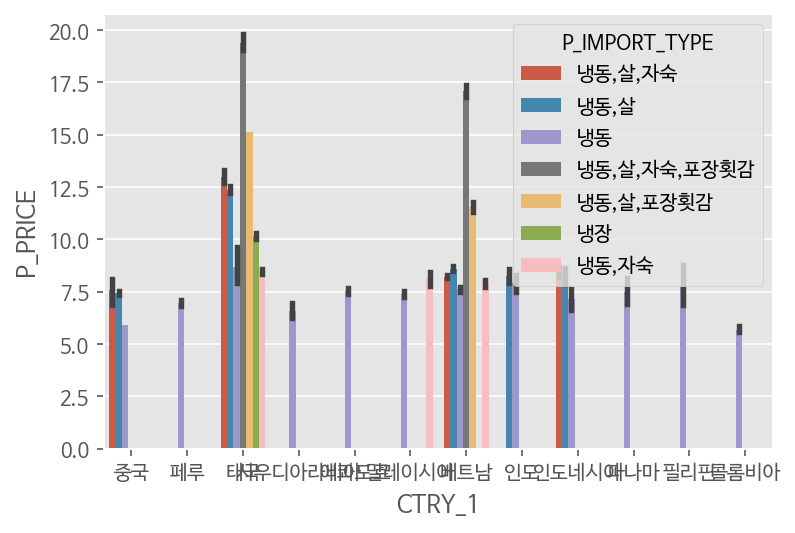

In [ ]:
sns.barplot(data=shrimp,x='CTRY_1',y='P_PRICE',hue='P_IMPORT_TYPE')

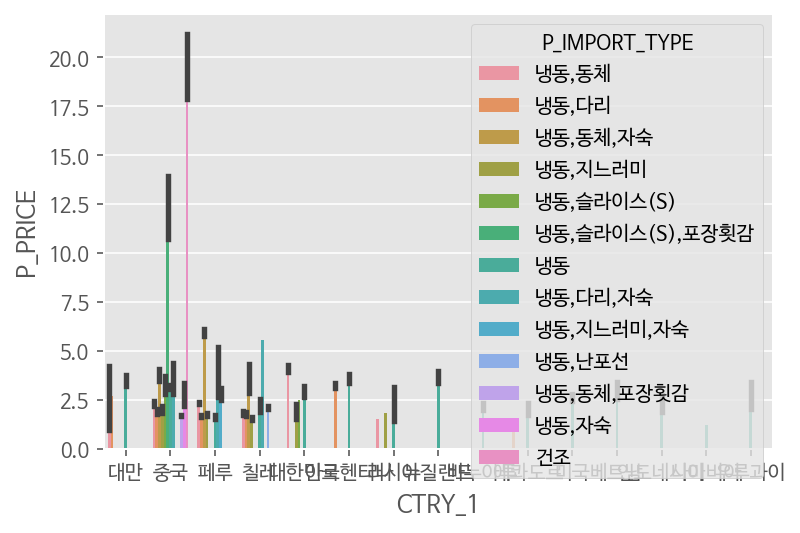

In [ ]:
sns.barplot(data=squid,x='CTRY_1',y='P_PRICE',hue='P_IMPORT_TYPE')

In [ ]:
vaild_data= pd.read_excel("/content/drvie/MyDrive/valildset.xlsx")

In [ ]:
vaild_salmon=vaild_data[vaild_data['P_NAME']== '연어']

In [ ]:
from fbprophet import Prophet
salmon.rename(columns = {'REG_DATE' : 'ds','P_PRICE' : 'y'}, inplace=True)

In [ ]:
salmon

ds P_TYPE CTRY_1 CTRY_2  ... P_NAME P_IMPORT_TYPE          y IMPORT_1
14240 2017-05-15    수산물   노르웨이   노르웨이  ...     연어      냉장,필렛(F)  62.457202       냉장
15859 2017-07-10    수산물   노르웨이   노르웨이  ...     연어      냉장,필렛(F)  52.263797       냉장
14834 2017-06-05    수산물   노르웨이   노르웨이  ...     연어      냉장,필렛(F)  51.394008       냉장
15663 2017-07-03    수산물   노르웨이   노르웨이  ...     연어      냉장,필렛(F)  50.173407       냉장
14444 2017-05-22    수산물   노르웨이   노르웨이  ...     연어      냉장,필렛(F)  49.777500       냉장
...          ...    ...    ...    ...  ...    ...           ...        ...      ...
32954 2019-02-18    수산물    러시아    러시아  ...     연어            냉동   2.887444       냉동
8750  2016-11-07    수산물    러시아    러시아  ...     연어            냉동   2.884304       냉동
32701 2019-02-11    수산물    러시아    러시아  ...     연어            냉동   1.900000       냉동
35188 2019-05-06    수산물    러시아    러시아  ...     연어            냉동   1.866149       냉동
5634  2016-07-18    수산물     칠레     칠레  ...     연어            냉장   1.674750       냉장

[1489 rows x 11 columns]

In [ ]:
salmon_reg=salmon[salmon['IMPORT_1'] == "냉장"]

No handles with labels found to put in legend.


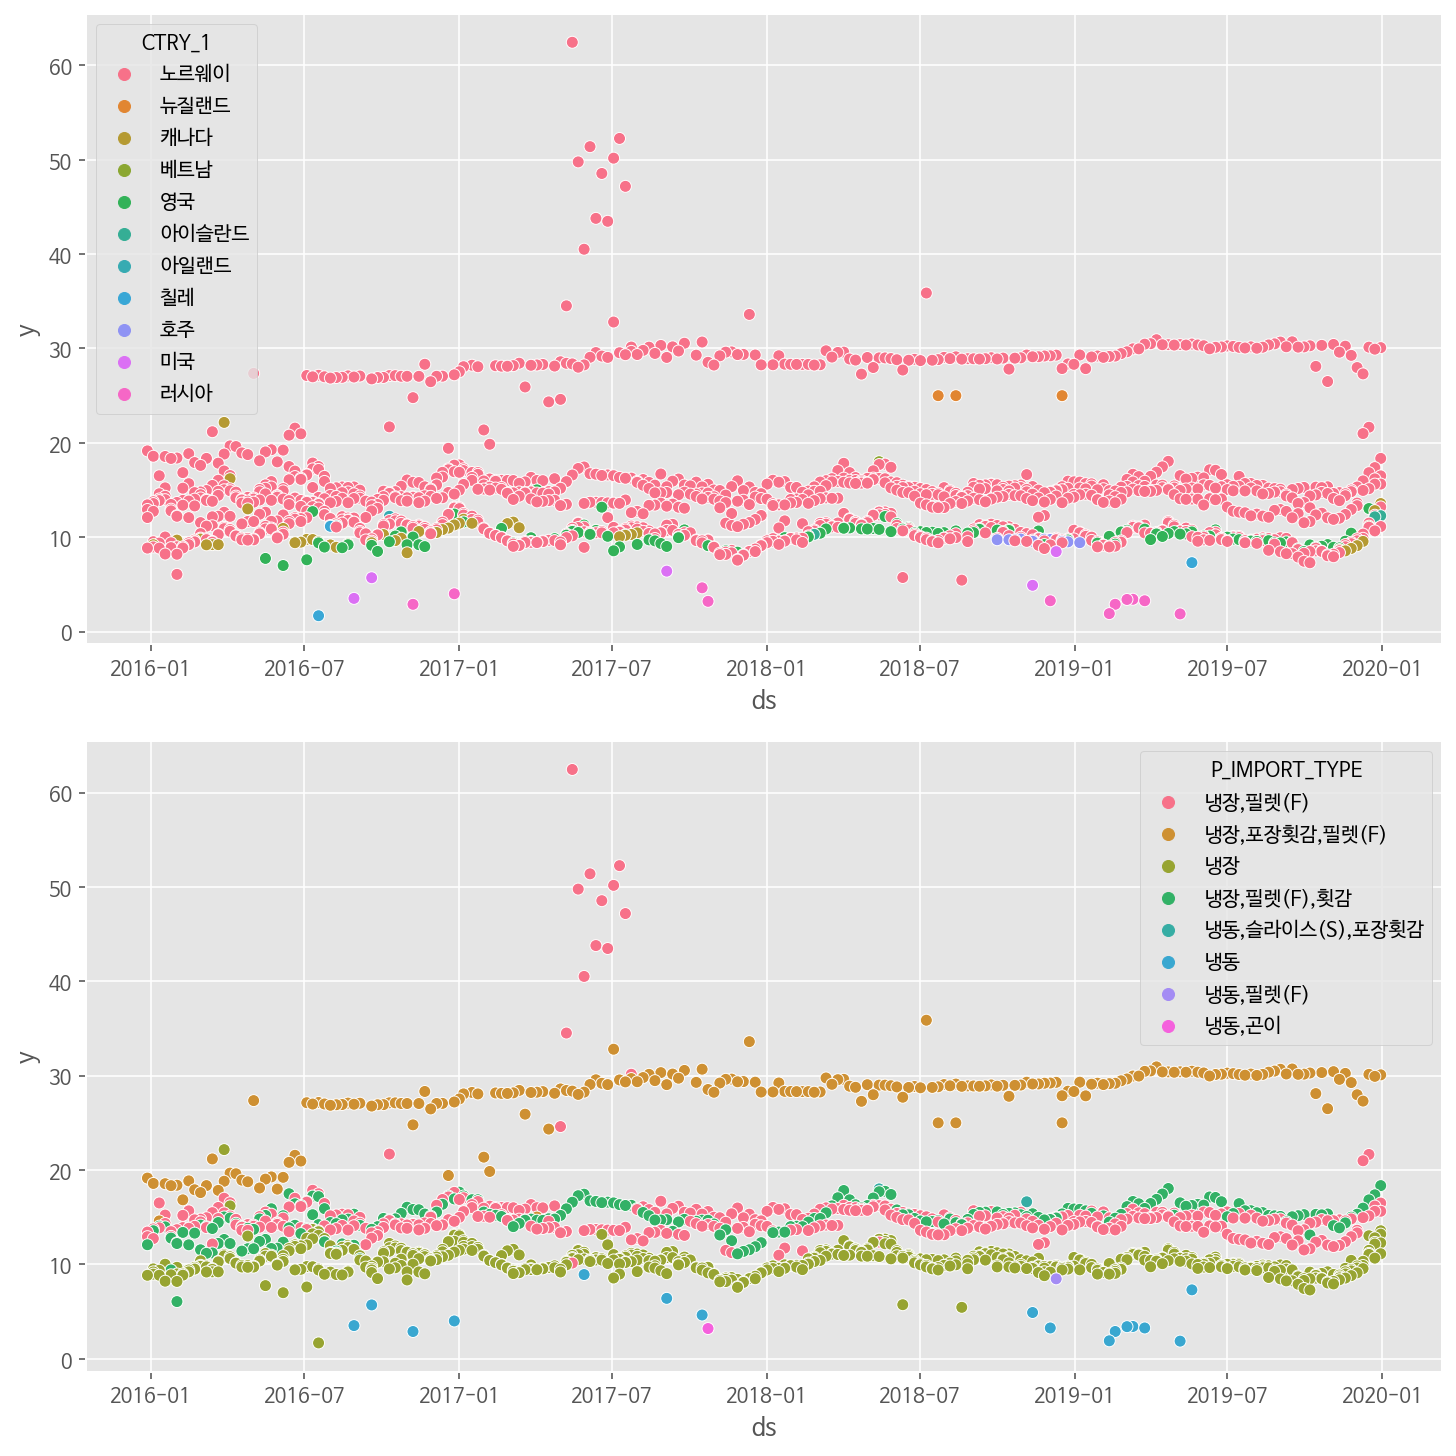

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10,10), sharey=False,constrained_layout=True)
plt.legend(loc='center left', bbox_to_anchor=(10.5, 10.5))
sns.scatterplot(data = salmon, x='ds', y='y',hue='CTRY_1',ci=None,ax=axes[0])
sns.scatterplot(data = salmon, x='ds', y='y',hue='P_IMPORT_TYPE',ci=None,ax=axes[1])
plt.show()

In [ ]:
salmon['CTRY_1'].value_counts()

노르웨이     1278
영국        120
캐나다        51
호주         12
러시아        11
미국          5
아이슬란드       3
칠레          3
뉴질랜드        3
아일랜드        2
베트남         1
Name: CTRY_1, dtype: int64

In [ ]:
salmon

ds P_TYPE CTRY_1 CTRY_2  ... P_NAME P_IMPORT_TYPE          y IMPORT_1
14240 2017-05-15    수산물   노르웨이   노르웨이  ...     연어      냉장,필렛(F)  62.457202       냉장
15859 2017-07-10    수산물   노르웨이   노르웨이  ...     연어      냉장,필렛(F)  52.263797       냉장
14834 2017-06-05    수산물   노르웨이   노르웨이  ...     연어      냉장,필렛(F)  51.394008       냉장
15663 2017-07-03    수산물   노르웨이   노르웨이  ...     연어      냉장,필렛(F)  50.173407       냉장
14444 2017-05-22    수산물   노르웨이   노르웨이  ...     연어      냉장,필렛(F)  49.777500       냉장
...          ...    ...    ...    ...  ...    ...           ...        ...      ...
32954 2019-02-18    수산물    러시아    러시아  ...     연어            냉동   2.887444       냉동
8750  2016-11-07    수산물    러시아    러시아  ...     연어            냉동   2.884304       냉동
32701 2019-02-11    수산물    러시아    러시아  ...     연어            냉동   1.900000       냉동
35188 2019-05-06    수산물    러시아    러시아  ...     연어            냉동   1.866149       냉동
5634  2016-07-18    수산물     칠레     칠레  ...     연어            냉장   1.674750       냉장

[1489 rows x 11 columns]

In [ ]:
salmon_df=salmon.drop(["CTRY_1","CATEGORY_1","CATEGORY_2","IMPORT_1",'P_NAME'],axis=1)

In [ ]:
salmon_df=pd.get_dummies(salmon_df)

In [ ]:
salmon_df['ds'].value_counts()

2016-07-18    10
2016-06-06     9
2016-07-04     9
2016-08-08     9
2016-07-11     9
              ..
2015-12-28     5
2018-08-20     5
2016-09-12     4
2018-01-01     4
2017-10-02     3
Name: ds, Length: 210, dtype: int64

In [ ]:
salmon_df.index=salmon['ds']
salmon_df=salmon_df.drop('ds',axis=1)

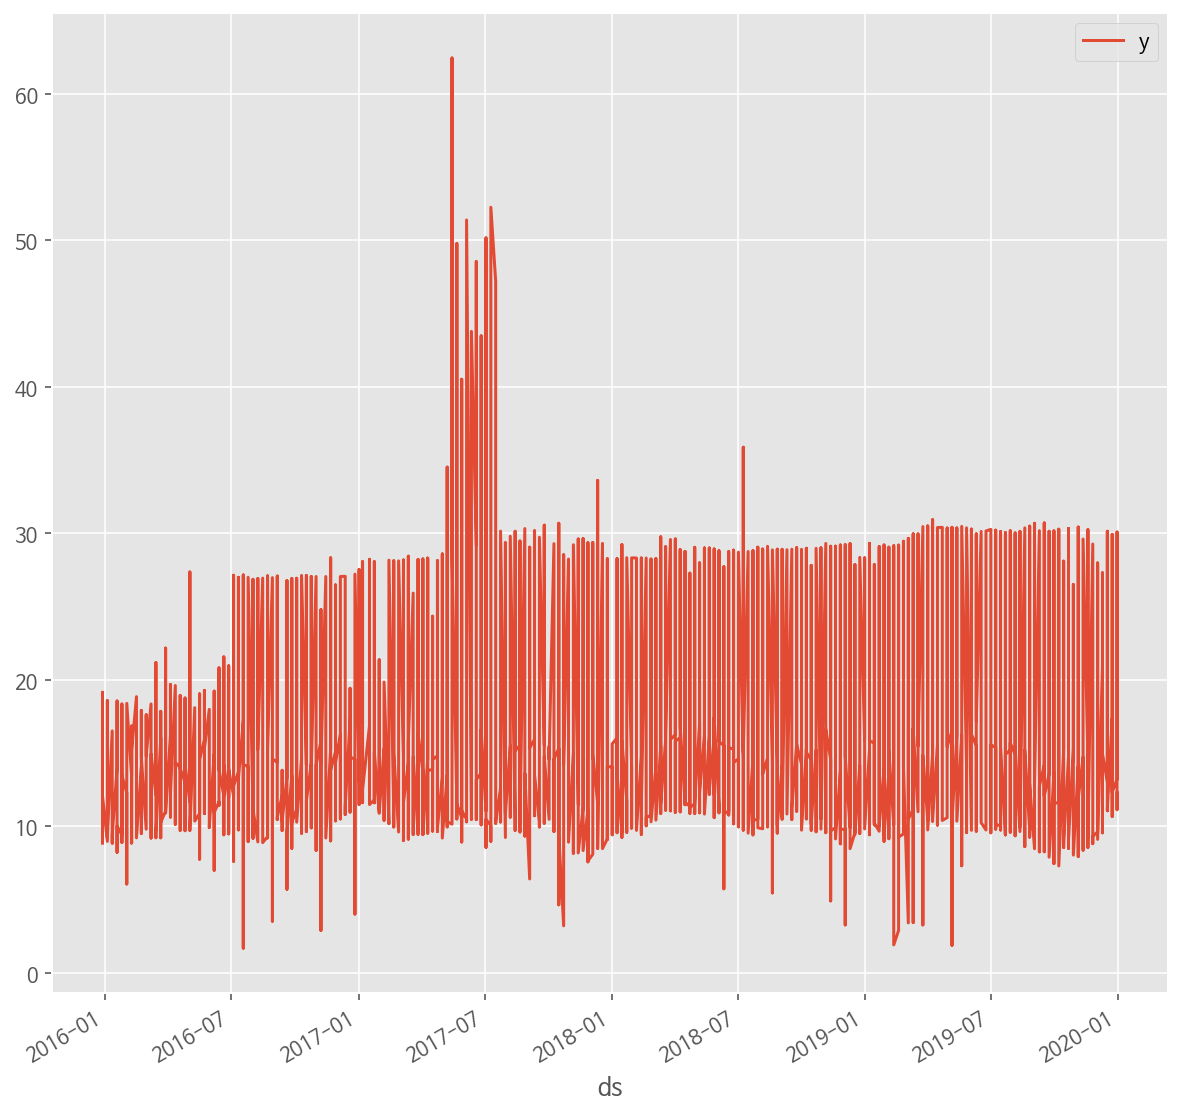

In [ ]:
salmon_df.plot(y='y',figsize=(10,10))

In [ ]:
squid['CTRY_1'].value_counts()

페루       826
중국       540
칠레       538
대만        62
대한민국      57
아르헨티나     56
뉴질랜드      44
러시아        8
미국         6
에콰도르       4
바누아투       2
베트남        2
우루과이       2
인도네시아      2
나미비아       1
Name: CTRY_1, dtype: int64

In [ ]:
shrimp['CTRY_1'].value_counts()

베트남        1018
태국          741
에콰도르        198
말레이시아       191
중국          161
인도          103
사우디아라비아      66
인도네시아        59
페루           49
파나마           7
필리핀           4
콜롬비아          4
Name: CTRY_1, dtype: int64

In [ ]:
salmon.groupby(['CTRY_1','P_IMPORT_TYPE']).count()

ds  P_TYPE  CTRY_2  ...  P_NAME    y  IMPORT_1
CTRY_1 P_IMPORT_TYPE                         ...                       
노르웨이   냉동                 1       1       1  ...       1    1         1
       냉동,슬라이스(S),포장횟감    1       1       1  ...       1    1         1
       냉장               413     413     413  ...     413  413       413
       냉장,포장횟감,필렛(F)    207     207     207  ...     207  207       207
       냉장,필렛(F)         420     420     420  ...     420  420       420
       냉장,필렛(F),횟감      236     236     236  ...     236  236       236
뉴질랜드   냉장,포장횟감,필렛(F)      3       3       3  ...       3    3         3
러시아    냉동                10      10      10  ...      10   10        10
       냉동,곤이              1       1       1  ...       1    1         1
미국     냉동                 4       4       4  ...       4    4         4
       냉동,필렛(F)           1       1       1  ...       1    1         1
베트남    냉동,슬라이스(S),포장횟감    1       1       1  ...       1    1         1
아이슬란드  냉장                 3       3       3  ...       3    3         3
아일랜드   냉장                 2       2       2  ...       2    2         2
영국     냉장               119     119     119  ...     119  119       119
       냉장,포장횟감,필렛(F)      1       1       1  ...       1    1         1
칠레     냉동                 1       1       1  ...       1    1         1
       냉장                 2       2       2  ...       2    2         2
캐나다    냉장                51      51      51  ...      51   51        51
호주     냉장                12      12      12  ...      12   12        12

[20 rows x 9 columns]

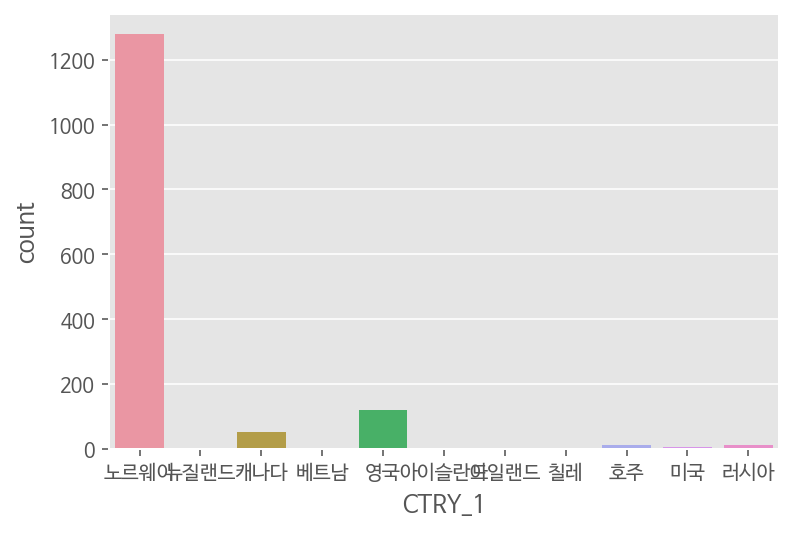

In [ ]:
sns.countplot(data=salmon,x='CTRY_1')

No handles with labels found to put in legend.


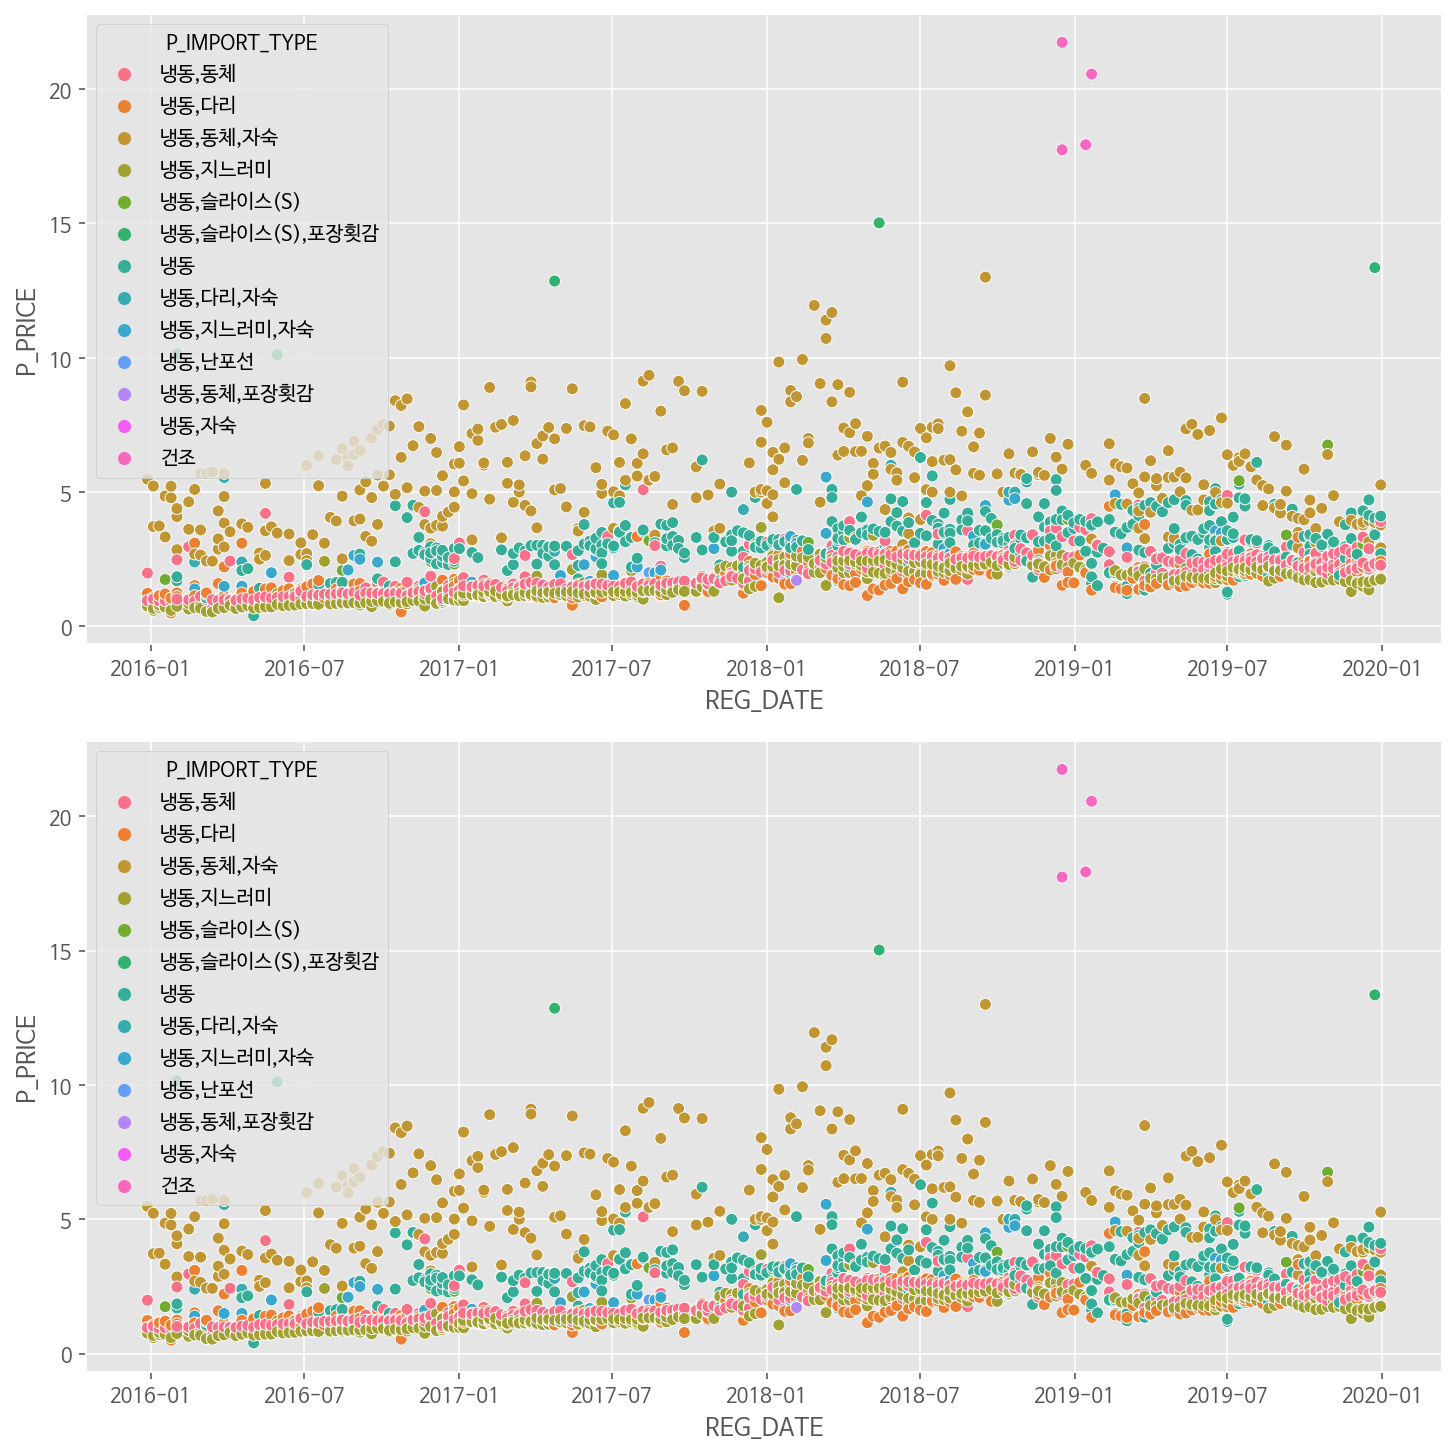

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10,10), sharey=False,constrained_layout=True)
plt.legend(loc='center left', bbox_to_anchor=(10.5, 10.5))
sns.scatterplot(data = squid, x='REG_DATE', y='P_PRICE',hue='P_IMPORT_TYPE',ci=None,ax=axes[0])
sns.scatterplot(data = squid, x='REG_DATE', y='P_PRICE',hue='P_IMPORT_TYPE',ci=None,ax=axes[1])
plt.show()

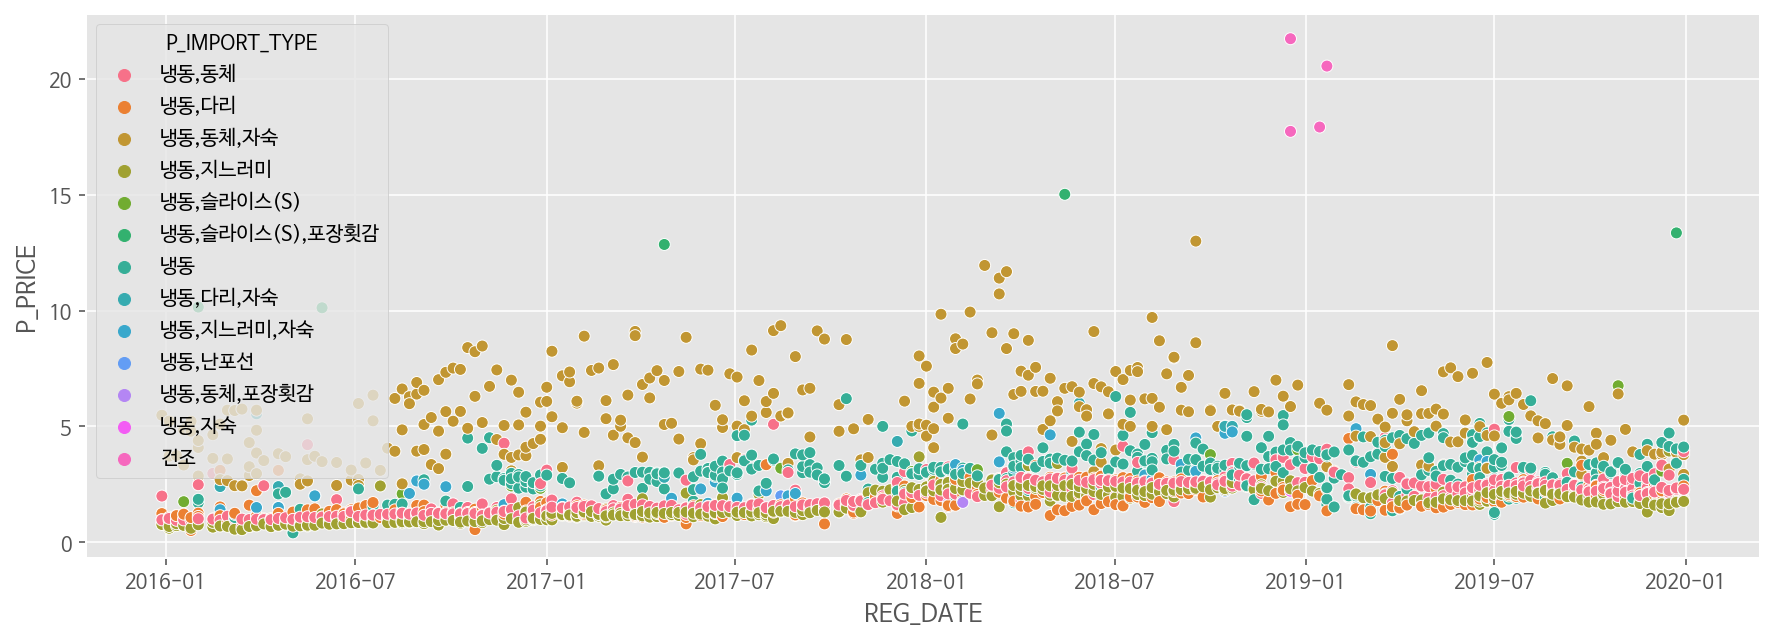

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = squid, x='REG_DATE', y='P_PRICE',hue='P_IMPORT_TYPE',ci=None)

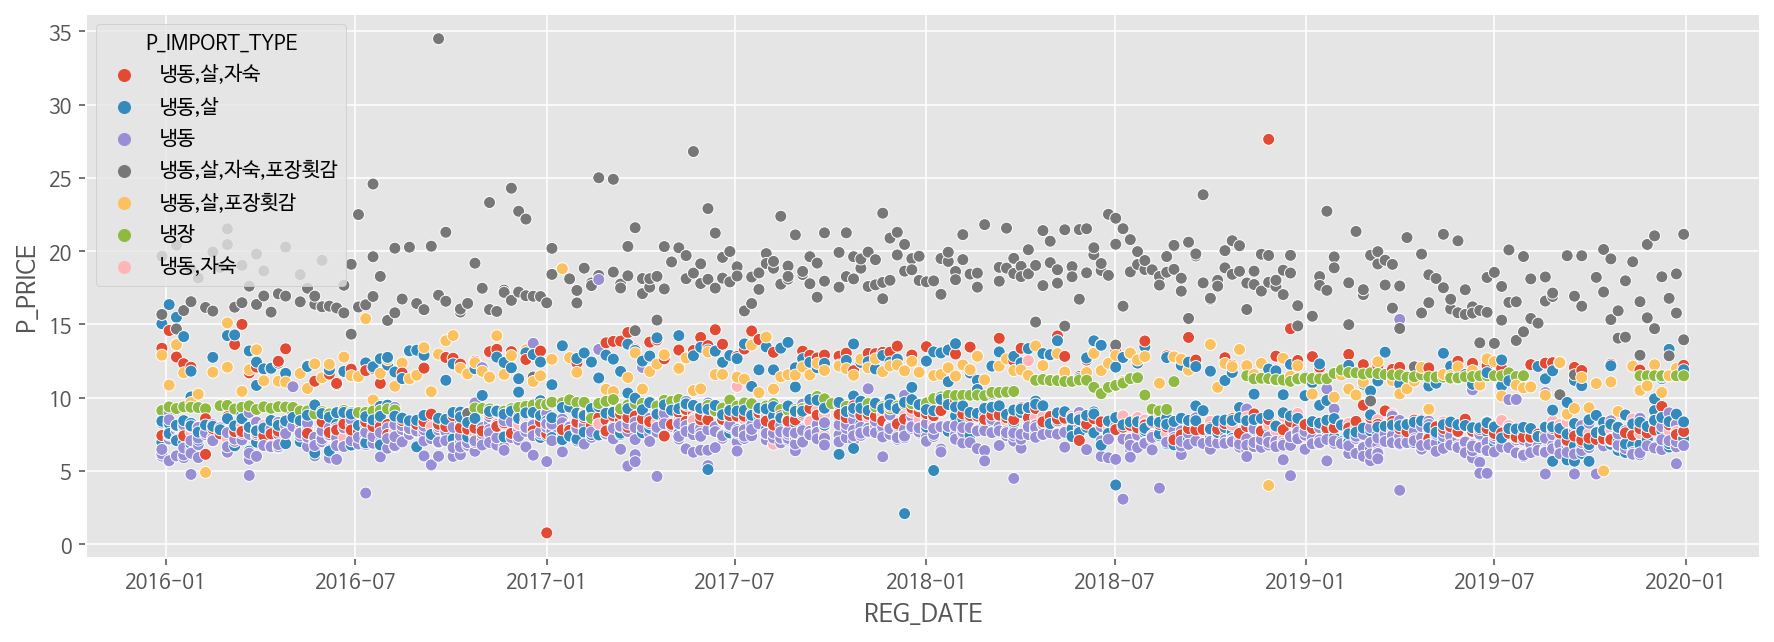

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = shrimp, x='REG_DATE', y='P_PRICE',hue='P_IMPORT_TYPE',ci=None)

In [ ]:
squid

REG_DATE P_TYPE CTRY_1 CTRY_2  ... P_NAME P_IMPORT_TYPE   P_PRICE IMPORT_1
46    2015-12-28    수산물     대만     대만  ...    오징어         냉동,동체  1.989999       냉동
94    2015-12-28    수산물     중국     중국  ...    오징어         냉동,동체  0.793729       냉동
119   2015-12-28    수산물     페루     페루  ...    오징어         냉동,다리  1.233434       냉동
143   2015-12-28    수산물     페루     페루  ...    오징어      냉동,동체,자숙  5.481140       냉동
160   2015-12-28    수산물     칠레     칠레  ...    오징어         냉동,다리  0.968083       냉동
...          ...    ...    ...    ...  ...    ...           ...       ...      ...
42016 2019-12-30    수산물     칠레     칠레  ...    오징어         냉동,동체  2.247963       냉동
42021 2019-12-30    수산물     페루     페루  ...    오징어      냉동,동체,자숙  5.269235       냉동
42027 2019-12-30    수산물     페루     페루  ...    오징어       냉동,지느러미  1.760060       냉동
42045 2019-12-30    수산물     페루     페루  ...    오징어         냉동,동체  2.281843       냉동
42067 2019-12-30    수산물     중국     중국  ...    오징어            냉동  4.108244       냉동

[2150 rows x 11 columns]